In [97]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
pd.options.display.max_columns=None

In [98]:
train=pd.read_csv('/content/drive/MyDrive/Train_Set_TVS.csv')
test=pd.read_csv('/content/drive/MyDrive/Test_Set_TVS.csv')

In [99]:
train.shape,test.shape

((132440, 33), (56760, 32))

In [100]:
tvs=pd.concat([train,test],ignore_index=True)
tvs.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,NaN,Metro,1,Grad,Married,F,1_to_3,0.9,Not_Specified,SAT,Yes,CLoan,3.0,2.0,East,46.0,10.0,Yes,No,0.077,0.077,18.0,2.0,1.0
1,511643,884222.0,N,198075.0,11173.06,0.0194,IT,ndf,Morethan_One,1.0,Metro,2,Grad,Married,M,1_to_3,3.0,Not_Specified,wed,Yes,CLoan,3.0,1.0,North,46.0,12.0,Yes,Yes,0.184,0.184,306.0,4.0,0.0
2,506688,284120.0,N,101056.0,8390.40,0.0118,Govt.,ndf,One,4.0,Metro,3,Other,Married,M,1_to_3,NaN,Not_Specified,mon,Yes,CLoan,2.0,3.0,North,57.0,5.0,Yes,Yes,0.538,0.538,281.0,4.0,0.0
3,499360,341874.0,N,179008.0,7184.13,0.0373,Non-IT,df,None,2.0,Metro,1,Grad,Married,M,1_to_3,4.7,Not_Specified,wed,Yes,RLoan,4.0,2.0,South,39.0,12.0,Yes,Yes,NaN,0.561,20.0,4.0,0.0
4,438350,1259895.0,Y,573715.0,13212.77,0.0138,Non-IT,ndf,Morethan_One,1.0,Rural,2,Grad,Married,F,4_to_6,6.9,Y,Sun,Yes,CLoan,3.0,1.0,North,32.0,16.0,Yes,Yes,NaN,0.200,2339.0,6.0,0.0


In [101]:
tvs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189200 entries, 0 to 189199
Data columns (total 33 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  189200 non-null  int64  
 1   Compensation        180208 non-null  float64
 2   Vehicle_Status      176213 non-null  object 
 3   Loan_amt            189200 non-null  float64
 4   Annuity_amt         182626 non-null  float64
 5   density_Ind         181509 non-null  float64
 6   Job_Type            174632 non-null  object 
 7   Default_hist        189200 non-null  object 
 8   Prop_List           186324 non-null  object 
 9   Home_Appliances     173477 non-null  float64
 10  Region_Type         189200 non-null  object 
 11  Credit_Inq          185344 non-null  object 
 12  Education_det       189200 non-null  object 
 13  Marital_Stat        189200 non-null  object 
 14  Gen                 189200 non-null  object 
 15  Credit_Lnks         189200 non-nul

**Univariate analysis for cat**

In [102]:
for i in tvs.select_dtypes('object').columns:
  print(tvs[i].value_counts())


N    116091
Y     60122
Name: Vehicle_Status, dtype: int64
IT        95774
Non-IT    42128
Govt.     36730
Name: Job_Type, dtype: int64
ndf    170240
df      18960
Name: Default_hist, dtype: int64
One             130781
Morethan_One     36942
None             18601
Name: Prop_List, dtype: int64
Metro    153596
Rural     31804
other      3800
Name: Region_Type, dtype: int64
1     95775
2     43392
3     33176
>4    13001
Name: Credit_Inq, dtype: int64
Grad      134266
P_Grad     46146
Other       8788
Name: Education_det, dtype: int64
Married    139334
Single      27999
Divorce     12118
Widow        9749
Name: Marital_Stat, dtype: int64
M    124322
F     64878
Name: Gen, dtype: int64
1_to_3    167976
4_to_6     18898
>6          2326
Name: Credit_Lnks, dtype: int64
Not_Specified    128289
Y                 49930
Name: Income_Alt, dtype: int64
Tue     33036
wed     32023
mon     31345
thur    31171
Fri     31012
SAT     20753
Sun      9860
Name: Day_Process, dtype: int64
Yes    151343
N

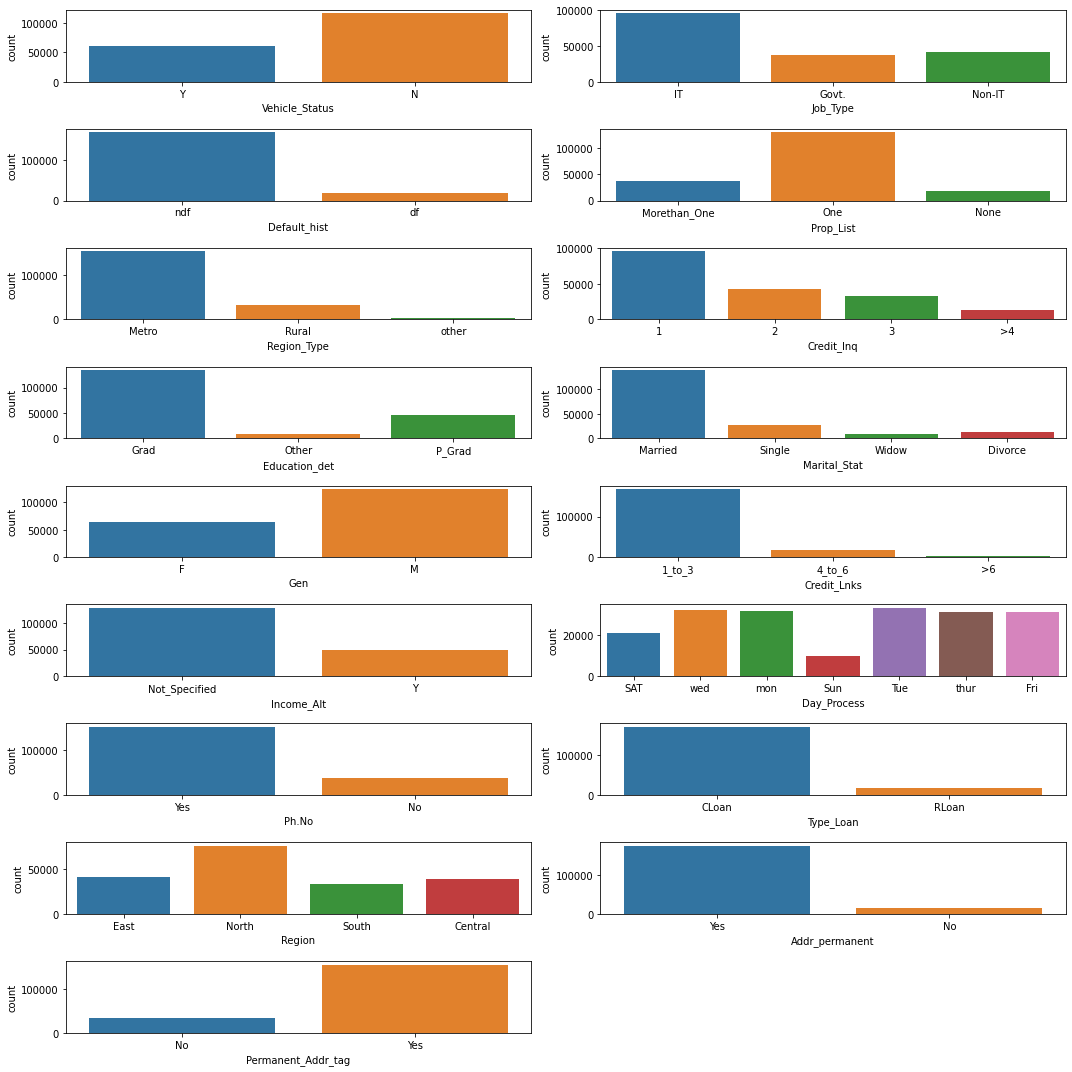

In [103]:
import warnings
warnings.filterwarnings('ignore')
c=1
plt.figure(figsize=[15,15])
for i in tvs.select_dtypes('object').columns:
    plt.subplot(9,2,c)
    sns.countplot(tvs[i])
    c=c+1
plt.tight_layout()
plt.show()

* most of the peaople don't have vehicle status
* It>nonit>govt
* male are more in number
* no default history
* more people have one property
* more people live in metro
* on weekend more number of application get proceed

In [104]:
tvs.select_dtypes('object').describe().T

,count,unique,top,freq
Vehicle_Status,176213,2,N,116091
Job_Type,174632,3,IT,95774
Default_hist,189200,2,ndf,170240
Prop_List,186324,3,One,130781
Region_Type,189200,3,Metro,153596
Credit_Inq,185344,4,1,95775
Education_det,189200,3,Grad,134266
Marital_Stat,189200,4,Married,139334
Gen,189200,2,M,124322
Credit_Lnks,189200,3,1_to_3,167976


In [105]:
tvs.columns

Index(['ID', 'Compensation', 'Vehicle_Status', 'Loan_amt', 'Annuity_amt',
       'density_Ind', 'Job_Type', 'Default_hist', 'Prop_List',
       'Home_Appliances', 'Region_Type', 'Credit_Inq', 'Education_det',
       'Marital_Stat', 'Gen', 'Credit_Lnks', 'Experience', 'Income_Alt',
       'Day_Process', 'Ph.No', 'Type_Loan', 'Dependents', 'Company_Rating',
       'Region', 'Age', 'hour_Process', 'Addr_permanent', 'Permanent_Addr_tag',
       'c1_rated', 'c2_rated', 'Contact_age', 'Product_bought', 'Default'],
      dtype='object')

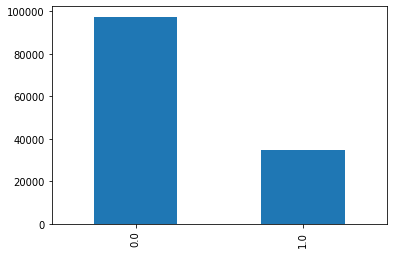

In [106]:
tvs['Default'].value_counts().plot(kind='bar')

### numerical variable

In [107]:
tvs.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,NaN,Metro,1,Grad,Married,F,1_to_3,0.9,Not_Specified,SAT,Yes,CLoan,3.0,2.0,East,46.0,10.0,Yes,No,0.077,0.077,18.0,2.0,1.0
1,511643,884222.0,N,198075.0,11173.06,0.0194,IT,ndf,Morethan_One,1.0,Metro,2,Grad,Married,M,1_to_3,3.0,Not_Specified,wed,Yes,CLoan,3.0,1.0,North,46.0,12.0,Yes,Yes,0.184,0.184,306.0,4.0,0.0
2,506688,284120.0,N,101056.0,8390.40,0.0118,Govt.,ndf,One,4.0,Metro,3,Other,Married,M,1_to_3,NaN,Not_Specified,mon,Yes,CLoan,2.0,3.0,North,57.0,5.0,Yes,Yes,0.538,0.538,281.0,4.0,0.0
3,499360,341874.0,N,179008.0,7184.13,0.0373,Non-IT,df,None,2.0,Metro,1,Grad,Married,M,1_to_3,4.7,Not_Specified,wed,Yes,RLoan,4.0,2.0,South,39.0,12.0,Yes,Yes,NaN,0.561,20.0,4.0,0.0
4,438350,1259895.0,Y,573715.0,13212.77,0.0138,Non-IT,ndf,Morethan_One,1.0,Rural,2,Grad,Married,F,4_to_6,6.9,Y,Sun,Yes,CLoan,3.0,1.0,North,32.0,16.0,Yes,Yes,NaN,0.200,2339.0,6.0,0.0


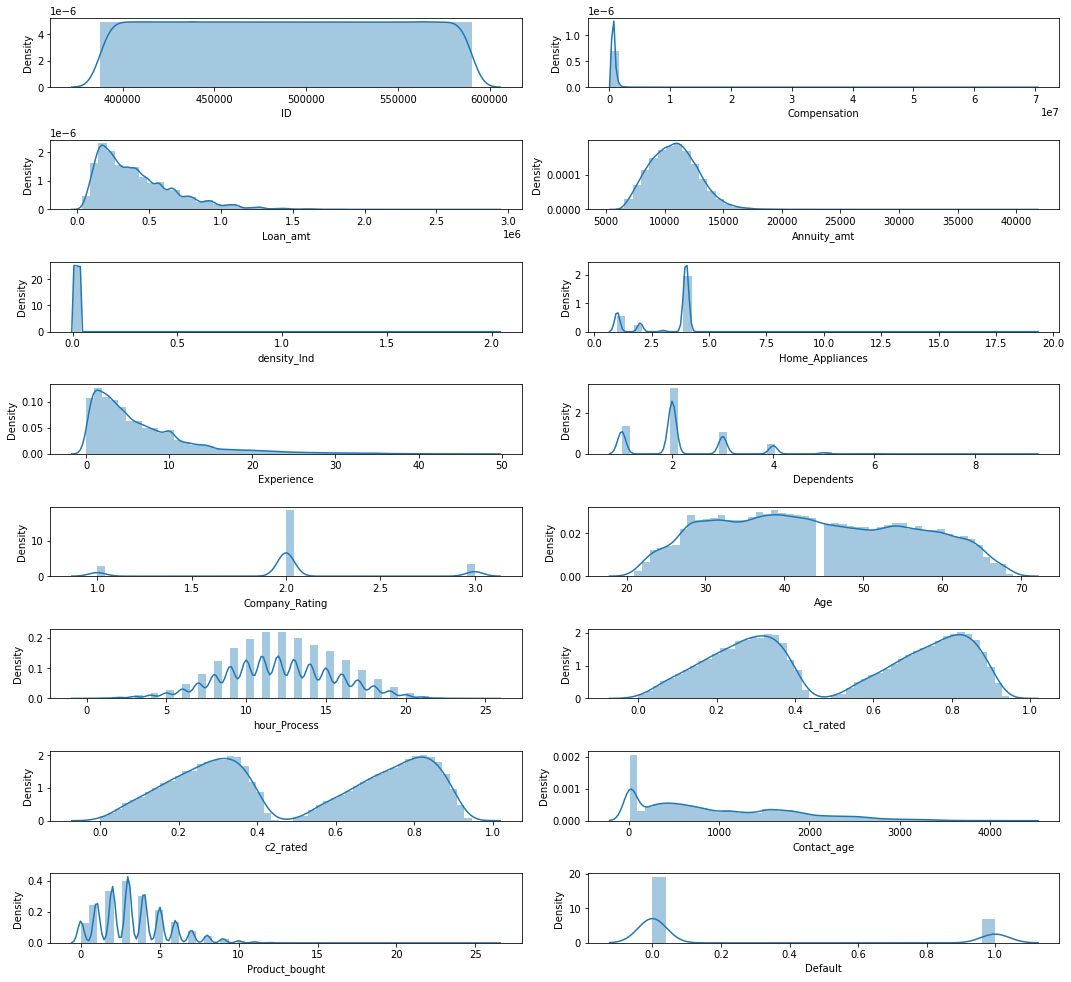

In [108]:
c=1
plt.figure(figsize=[15,15])
for i in tvs.select_dtypes(exclude='object').columns:
    plt.subplot(9,2,c)
    sns.distplot(tvs[i])
    c=c+1
plt.tight_layout()
plt.show()

In [109]:
tvs.select_dtypes(exclude='object').describe().T

,count,mean,std,min,25%,50%,75%,max
ID,189200.0,489003.885650,58535.577453,387652.0,438319.5000,488950.5000,539701.2500,5.904070e+05
Compensation,180208.0,744230.438577,444248.729335,148330.0,517246.5000,666187.5000,878798.5000,7.037702e+07
Loan_amt,189200.0,414729.738070,275070.546830,34275.0,204265.9875,349361.0000,558660.0000,2.872142e+06
Annuity_amt,182626.0,10841.400309,2061.154305,5852.1,9346.6775,10768.6650,12158.0975,4.130100e+04
density_Ind,181509.0,0.020452,0.015611,0.0,0.0104,0.0203,0.0304,2.037200e+00
Home_Appliances,173477.0,3.220830,1.241502,1.0,2.0000,4.0000,4.0000,1.900000e+01
Experience,158004.0,6.583515,6.335341,0.0,2.1000,4.6000,9.0000,4.810000e+01
Dependents,189200.0,2.154075,0.909041,1.0,2.0000,2.0000,3.0000,9.000000e+00
Company_Rating,172416.0,2.029933,0.504140,1.0,2.0000,2.0000,2.0000,3.000000e+00
Age,189200.0,43.936580,11.967729,21.0,34.0000,43.0000,54.0000,6.900000e+01


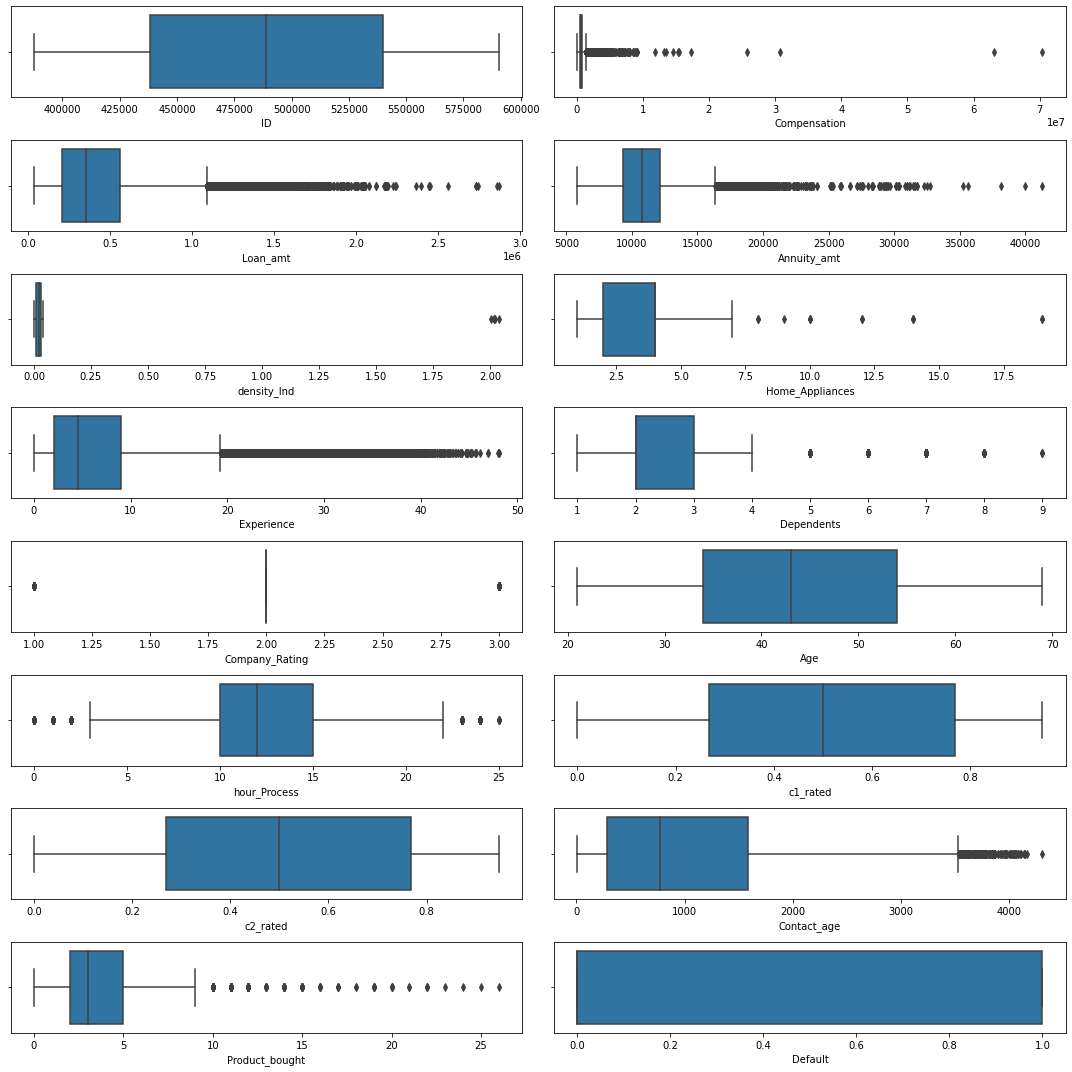

In [110]:
c=1
plt.figure(figsize=[15,15])
for i in tvs.select_dtypes(exclude='object').columns:
    plt.subplot(8,2,c)
    sns.boxplot(tvs[i])
    c=c+1
plt.tight_layout()
plt.show()

**Bivariate analysis**

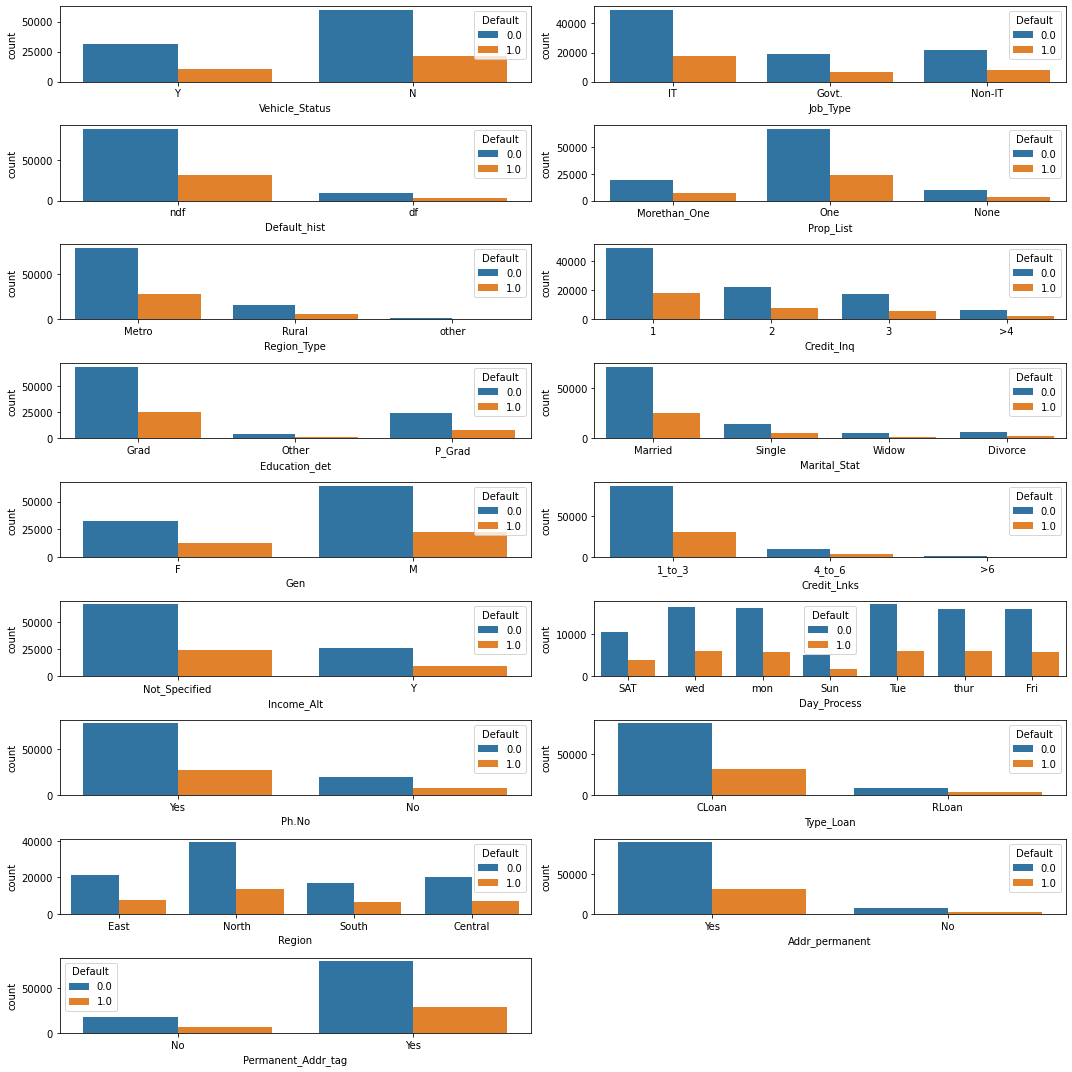

In [111]:
c=1
plt.figure(figsize=[15,15])
for i in tvs.select_dtypes('object').columns:
    plt.subplot(9,2,c)
    sns.countplot(tvs[i],hue=tvs['Default'])
    c=c+1
plt.tight_layout()
plt.show()

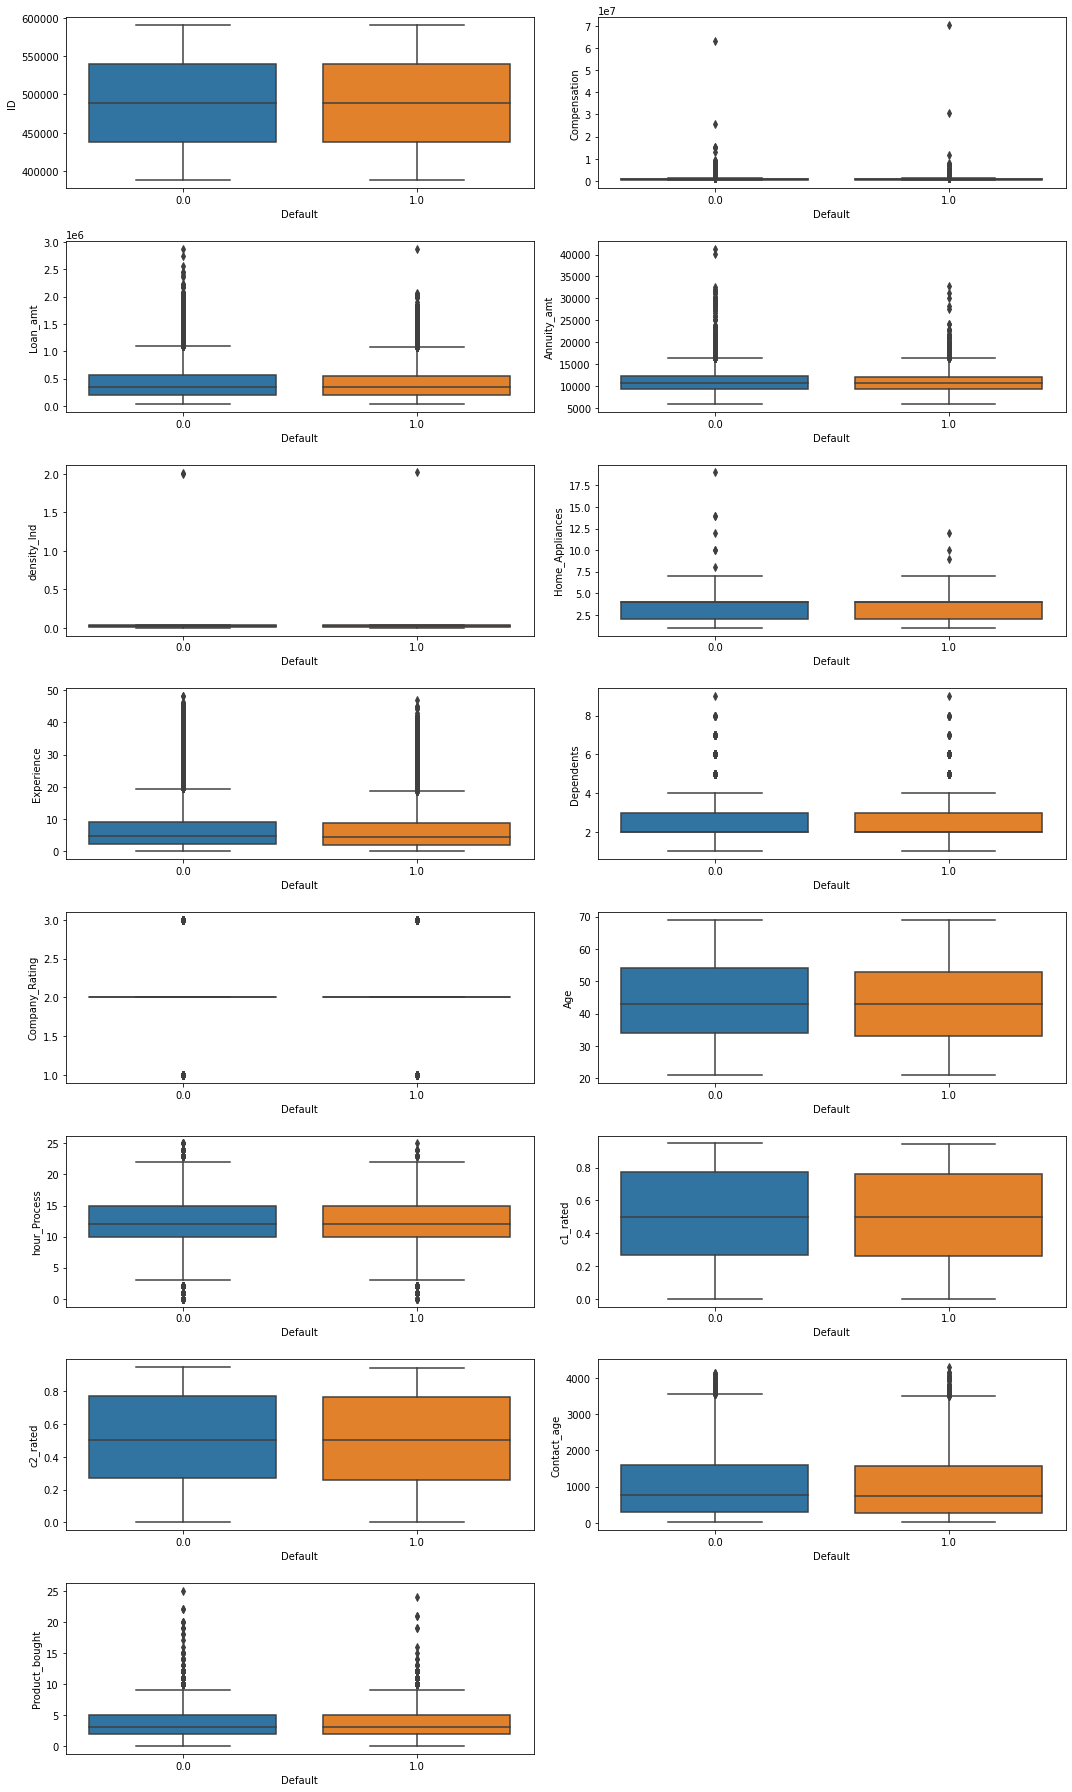

In [112]:
c=1
plt.figure(figsize=[15,25])
for i in tvs.select_dtypes(exclude='object').columns[0:-1]:
    plt.subplot(8,2,c)
    sns.boxplot(tvs['Default'],tvs[i])
    c=c+1
plt.tight_layout()
plt.show()

* through visualization comp,age,c1_rated,c2_rated,experience ,hour_process,dependents doesn't play an important role


**Statistical Analysis**

In [113]:
# categorical
sdf=DataFrame()
a=[]
b=[]
for i in tvs.select_dtypes('object').columns:
  con=pd.crosstab(tvs[i],tvs['Default'])
  t,p,df,exp=stats.chi2_contingency(con)
  a.append(i)
  b.append(p)
sdf['feature']=a
sdf['pvalue']=b

In [114]:
catimp=list(sdf[sdf['pvalue']<0.05]['feature'])

In [115]:
# Company rating
con=pd.crosstab(tvs['Company_Rating'],tvs['Default'])
t,p,df,exp=stats.chi2_contingency(con)
p

5.020141980570193e-07

In [116]:
catimp.append('Company_Rating')


In [117]:
catimp.remove('Company_Rating')

In [118]:
catimp

['Vehicle_Status',
 'Credit_Inq',
 'Education_det',
 'Gen',
 'Credit_Lnks',
 'Ph.No',
 'Type_Loan',
 'Region',
 'Addr_permanent']

In [119]:
tvs.columns

Index(['ID', 'Compensation', 'Vehicle_Status', 'Loan_amt', 'Annuity_amt',
       'density_Ind', 'Job_Type', 'Default_hist', 'Prop_List',
       'Home_Appliances', 'Region_Type', 'Credit_Inq', 'Education_det',
       'Marital_Stat', 'Gen', 'Credit_Lnks', 'Experience', 'Income_Alt',
       'Day_Process', 'Ph.No', 'Type_Loan', 'Dependents', 'Company_Rating',
       'Region', 'Age', 'hour_Process', 'Addr_permanent', 'Permanent_Addr_tag',
       'c1_rated', 'c2_rated', 'Contact_age', 'Product_bought', 'Default'],
      dtype='object')

In [120]:
## Numerical columns
for i in tvs.select_dtypes(exclude='object').columns:
  print(i)
  print(stats.shapiro(tvs[i]))

ID
ShapiroResult(statistic=0.9549057483673096, pvalue=0.0)
Compensation
ShapiroResult(statistic=nan, pvalue=1.0)
Loan_amt
ShapiroResult(statistic=0.8924770951271057, pvalue=0.0)
Annuity_amt
ShapiroResult(statistic=nan, pvalue=1.0)
density_Ind
ShapiroResult(statistic=nan, pvalue=1.0)
Home_Appliances
ShapiroResult(statistic=nan, pvalue=1.0)
Experience
ShapiroResult(statistic=nan, pvalue=1.0)
Dependents
ShapiroResult(statistic=0.8394752144813538, pvalue=0.0)
Company_Rating
ShapiroResult(statistic=nan, pvalue=1.0)
Age
ShapiroResult(statistic=0.9688939452171326, pvalue=0.0)
hour_Process
ShapiroResult(statistic=0.9923102855682373, pvalue=0.0)
c1_rated
ShapiroResult(statistic=nan, pvalue=1.0)
c2_rated
ShapiroResult(statistic=nan, pvalue=1.0)
Contact_age
ShapiroResult(statistic=nan, pvalue=1.0)
Product_bought
ShapiroResult(statistic=0.9427663087844849, pvalue=0.0)
Default
ShapiroResult(statistic=nan, pvalue=1.0)


In [121]:
# before this we have first do null value treatment

**Missing value Treatment**

In [122]:
tvs.isnull().sum()/len(tvs)*100

ID                     0.000000
Compensation           4.752643
Vehicle_Status         6.864165
Loan_amt               0.000000
Annuity_amt            3.474630
density_Ind            4.065011
Job_Type               7.699789
Default_hist           0.000000
Prop_List              1.520085
Home_Appliances        8.310254
Region_Type            0.000000
Credit_Inq             2.038055
Education_det          0.000000
Marital_Stat           0.000000
Gen                    0.000000
Credit_Lnks            0.000000
Experience            16.488372
Income_Alt             5.803911
Day_Process            0.000000
Ph.No                  0.000000
Type_Loan              0.000000
Dependents             0.000000
Company_Rating         8.871036
Region                 0.000000
Age                    0.000000
hour_Process           0.000000
Addr_permanent         0.000000
Permanent_Addr_tag     0.000000
c1_rated              13.147992
c2_rated              10.029598
Contact_age            6.170719
Product_

In [123]:
# sns.pairplot(tvs)

In [124]:
tvs.corr()

,ID,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Dependents,Company_Rating,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought,Default
ID,1.000000,-0.000418,-0.000106,0.002072,-0.000430,0.002751,-0.003820,-0.000845,0.002919,0.000230,-0.003405,0.005551,0.005149,-0.001585,0.000099,0.000072
Compensation,-0.000418,1.000000,0.280393,0.253565,0.001271,-0.027861,0.027018,0.028360,-0.174517,-0.045274,0.065980,-0.015813,-0.015542,0.033875,0.019165,-0.001455
Loan_amt,-0.000106,0.280393,1.000000,0.483929,0.001222,0.002802,0.075438,0.053199,-0.101520,0.047500,0.043679,0.005614,0.005184,0.062134,-0.031464,-0.008946
Annuity_amt,0.002072,0.253565,0.483929,1.000000,0.001025,-0.013102,0.033837,0.050024,-0.095105,-0.007743,0.031228,0.002950,0.000707,0.041594,-0.007434,-0.004134
density_Ind,-0.000430,0.001271,0.001222,0.001025,1.000000,0.000703,-0.002052,0.000662,-0.010225,-0.002331,0.005550,-0.001131,-0.000931,-0.002636,0.004663,0.000991
Home_Appliances,0.002751,-0.027861,0.002802,-0.013102,0.000703,1.000000,0.072470,-0.619064,-0.008973,0.329358,0.001083,0.009828,0.010796,-0.008208,0.030700,-0.003848
Experience,-0.003820,0.027018,0.075438,0.033837,-0.002052,0.072470,1.000000,-0.034425,0.007473,0.329639,-0.013433,0.038570,0.039368,0.130885,0.000019,-0.022894
Dependents,-0.000845,0.028360,0.053199,0.050024,0.000662,-0.619064,-0.034425,1.000000,0.031220,-0.265571,-0.010698,-0.005166,-0.005253,0.027462,-0.017466,0.002355
Company_Rating,0.002919,-0.174517,-0.101520,-0.095105,-0.010225,-0.008973,0.007473,0.031220,1.000000,-0.006847,-0.233268,-0.002113,-0.000811,-0.022590,0.008000,0.015499
Age,0.000230,-0.045274,0.047500,-0.007743,-0.002331,0.329358,0.329639,-0.265571,-0.006847,1.000000,-0.077834,0.060222,0.060788,0.075861,0.050672,-0.023211


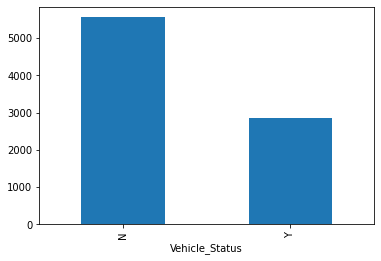

None


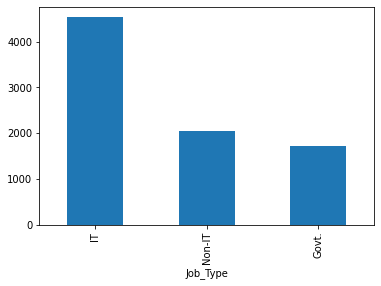

None


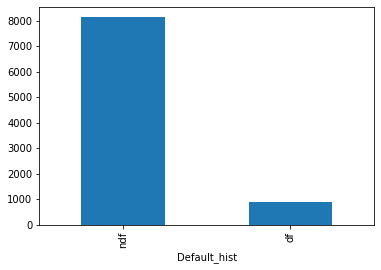

None


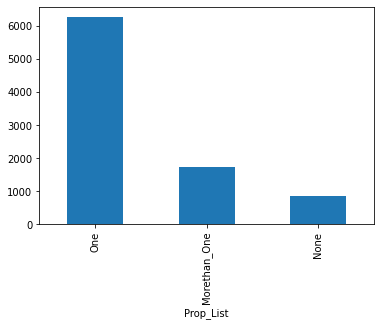

None


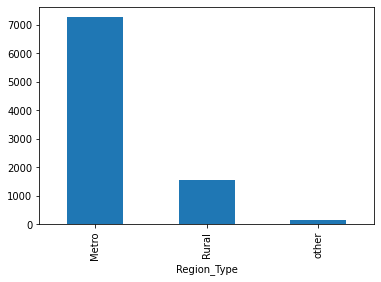

None


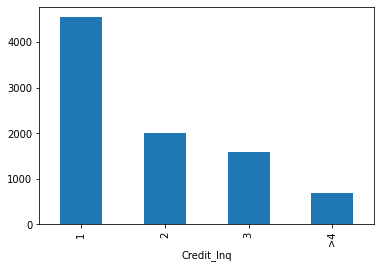

None


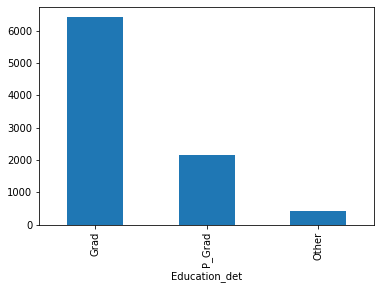

None


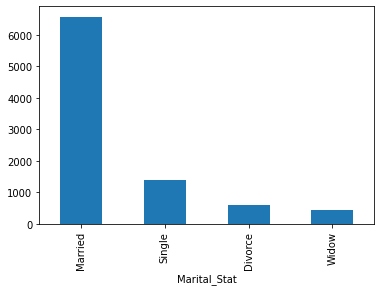

None


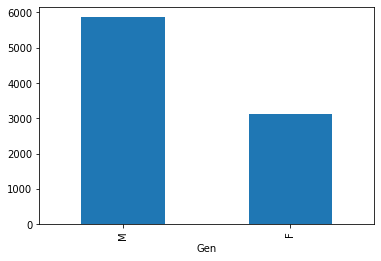

None


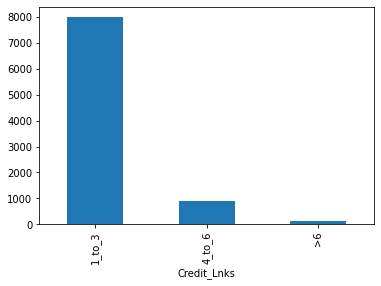

None


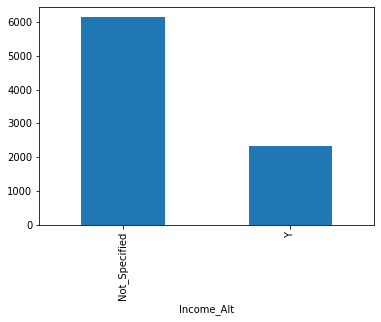

None


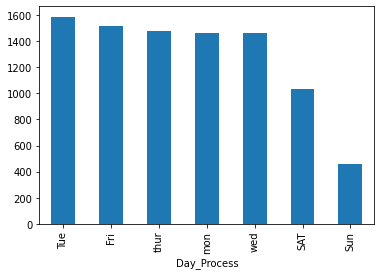

None


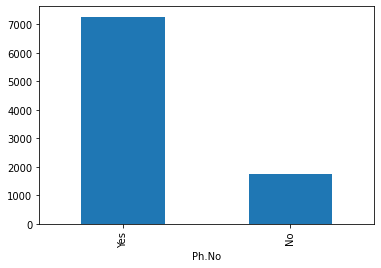

None


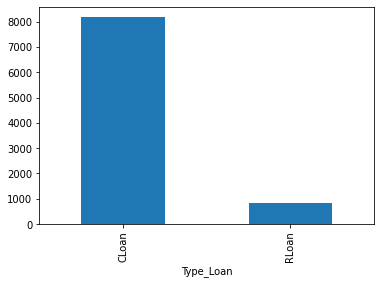

None


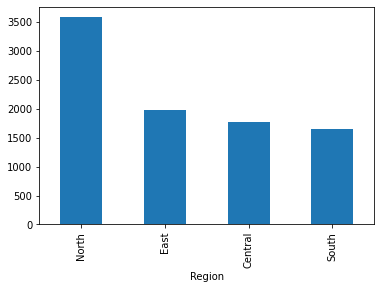

None


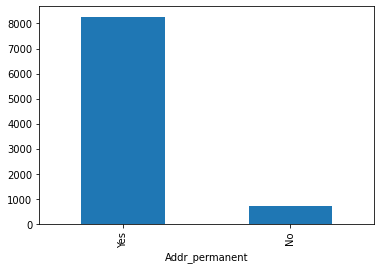

None


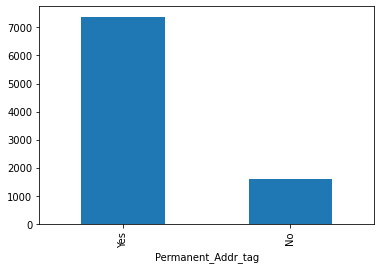

None


In [125]:
for i in tvs[tvs['Compensation'].isnull()].select_dtypes('object').columns:
  im=tvs[tvs['Compensation'].isnull()][i].value_counts().plot(kind='bar')
  plt.xlabel(i)
  im1=plt.show()
  print(im1)

In [126]:
tvs[tvs['Compensation'].isnull()].describe(include='object').T

,count,unique,top,freq
Vehicle_Status,8405,2,N,5556
Job_Type,8294,3,IT,4532
Default_hist,8992,2,ndf,8121
Prop_List,8855,3,One,6268
Region_Type,8992,3,Metro,7265
Credit_Inq,8823,4,1,4546
Education_det,8992,3,Grad,6412
Marital_Stat,8992,4,Married,6587
Gen,8992,2,M,5869
Credit_Lnks,8992,3,1_to_3,7977


In [127]:
tvs[tvs['Compensation'].isnull()]['Company_Rating'].value_counts()

2.0    6117
3.0    1157
1.0     908
Name: Company_Rating, dtype: int64

In [128]:
tvs[tvs['Compensation'].isnull()]['Default'].value_counts()

0.0    4627
1.0    1615
Name: Default, dtype: int64

In [129]:
tvs.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,NaN,Metro,1,Grad,Married,F,1_to_3,0.9,Not_Specified,SAT,Yes,CLoan,3.0,2.0,East,46.0,10.0,Yes,No,0.077,0.077,18.0,2.0,1.0
1,511643,884222.0,N,198075.0,11173.06,0.0194,IT,ndf,Morethan_One,1.0,Metro,2,Grad,Married,M,1_to_3,3.0,Not_Specified,wed,Yes,CLoan,3.0,1.0,North,46.0,12.0,Yes,Yes,0.184,0.184,306.0,4.0,0.0
2,506688,284120.0,N,101056.0,8390.40,0.0118,Govt.,ndf,One,4.0,Metro,3,Other,Married,M,1_to_3,NaN,Not_Specified,mon,Yes,CLoan,2.0,3.0,North,57.0,5.0,Yes,Yes,0.538,0.538,281.0,4.0,0.0
3,499360,341874.0,N,179008.0,7184.13,0.0373,Non-IT,df,None,2.0,Metro,1,Grad,Married,M,1_to_3,4.7,Not_Specified,wed,Yes,RLoan,4.0,2.0,South,39.0,12.0,Yes,Yes,NaN,0.561,20.0,4.0,0.0
4,438350,1259895.0,Y,573715.0,13212.77,0.0138,Non-IT,ndf,Morethan_One,1.0,Rural,2,Grad,Married,F,4_to_6,6.9,Y,Sun,Yes,CLoan,3.0,1.0,North,32.0,16.0,Yes,Yes,NaN,0.200,2339.0,6.0,0.0


In [130]:
tvs.groupby('Job_Type').describe()['Compensation']

,count,mean,std,min,25%,50%,75%,max
Job_Type,,,,,,,,
Govt.,35016.0,704820.115833,321814.822636,151708.0,494865.75,635672.0,838652.75,7831836.0
IT,91242.0,714860.123123,462115.217614,148330.0,508600.50,647019.0,844468.50,70377021.0
Non-IT,40080.0,846738.736352,504323.261992,164844.0,568460.25,744557.5,991152.50,30689828.0


In [131]:
# treating null values of compensation with the refrence of job _type
tvs['Compensation'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
189195    False
189196    False
189197    False
189198    False
189199     True
Name: Compensation, Length: 189200, dtype: bool

In [132]:
tvs.isnull().sum()[tvs.isnull().sum()!=0]

Compensation        8992
Vehicle_Status     12987
Annuity_amt         6574
density_Ind         7691
Job_Type           14568
Prop_List           2876
Home_Appliances    15723
Credit_Inq          3856
Experience         31196
Income_Alt         10981
Company_Rating     16784
c1_rated           24876
c2_rated           18976
Contact_age        11675
Default            56760
dtype: int64

In [133]:
tvs1=tvs.copy()

In [134]:
for i in tvs[tvs1['Compensation'].isnull()].index:
  for j in tvs1['Job_Type'].unique():
    if tvs1.loc[i,'Job_Type']==j:
      tvs1.loc[i,'Compensation']=tvs1.loc[tvs1['Job_Type']==j,'Compensation'].median()
    else:
      pass

  




In [135]:
tvs1.isnull().sum()[tvs1.isnull().sum()!=0]

Compensation         698
Vehicle_Status     12987
Annuity_amt         6574
density_Ind         7691
Job_Type           14568
Prop_List           2876
Home_Appliances    15723
Credit_Inq          3856
Experience         31196
Income_Alt         10981
Company_Rating     16784
c1_rated           24876
c2_rated           18976
Contact_age        11675
Default            56760
dtype: int64

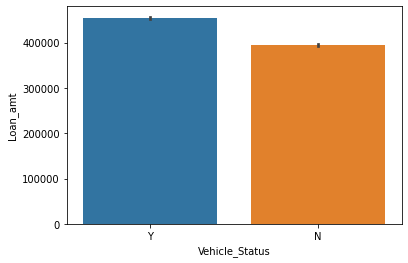

In [136]:
sns.barplot(tvs1['Vehicle_Status'],tvs1['Loan_amt'])

In [137]:
tvs1[tvs1['Annuity_amt'].isnull()]

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
15,449550,627720.0,N,326652.0,NaN,0.0105,NaN,ndf,One,4.0,Rural,1,P_Grad,Married,M,1_to_3,5.3,Y,SAT,Yes,CLoan,2.0,2.0,South,34.0,15.0,Yes,Yes,0.118,0.118,1901.0,1.0,0.0
16,431744,506520.0,N,825384.0,NaN,0.0365,IT,ndf,Morethan_One,1.0,Metro,>4,P_Grad,Married,M,1_to_3,12.8,Not_Specified,Fri,Yes,CLoan,2.0,2.0,North,46.0,15.0,Yes,No,0.216,0.216,1625.0,5.0,0.0
46,588971,683748.0,N,337758.0,NaN,0.0162,Govt.,ndf,One,4.0,Metro,>4,P_Grad,Married,F,1_to_3,17.5,Not_Specified,Fri,Yes,CLoan,2.0,3.0,South,52.0,12.0,Yes,Yes,0.749,0.749,512.0,3.0,1.0
77,582351,617760.0,N,297835.0,NaN,0.0109,Non-IT,ndf,One,4.0,Metro,2,Grad,Married,M,1_to_3,4.2,NaN,Tue,Yes,CLoan,2.0,2.0,South,43.0,7.0,Yes,Yes,0.273,0.273,30.0,1.0,0.0
94,584957,828750.0,N,671292.6,NaN,0.0081,Non-IT,ndf,One,4.0,Rural,1,P_Grad,Married,M,1_to_3,1.9,Y,wed,No,CLoan,2.0,2.0,East,61.0,16.0,Yes,Yes,NaN,0.330,353.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189051,506940,891905.0,N,430704.0,NaN,0.0082,IT,ndf,One,4.0,Metro,1,P_Grad,Divorce,M,1_to_3,21.5,Not_Specified,SAT,Yes,CLoan,1.0,2.0,Central,53.0,9.0,Yes,Yes,0.338,0.338,11.0,0.0,NaN
189056,442615,1785924.0,Y,758584.0,NaN,0.0389,Non-IT,ndf,Morethan_One,1.0,Metro,2,P_Grad,Married,F,1_to_3,6.4,Not_Specified,Fri,Yes,CLoan,3.0,2.0,East,35.0,8.0,Yes,Yes,0.205,0.205,2716.0,3.0,NaN
189111,392399,1769480.0,N,165630.0,NaN,0.0241,Non-IT,ndf,One,4.0,Metro,2,Grad,Single,F,4_to_6,3.6,Not_Specified,Fri,Yes,CLoan,1.0,NaN,Central,42.0,10.0,Yes,Yes,0.053,0.053,1141.0,6.0,NaN
189134,393900,459762.0,Y,604779.7,NaN,0.0098,IT,ndf,NaN,4.0,Metro,1,Grad,Married,M,1_to_3,10.5,Y,Fri,No,CLoan,2.0,2.0,Central,42.0,12.0,Yes,Yes,0.824,0.824,387.0,4.0,NaN


In [138]:
tvs1[tvs1['Annuity_amt'].isnull()]['Type_Loan'].unique()

array(['CLoan', 'RLoan'], dtype=object)

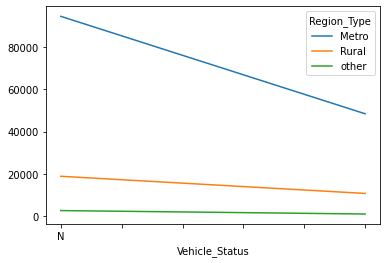

In [139]:
pd.crosstab(tvs1['Vehicle_Status'],tvs1['Region_Type']).plot()

In [140]:
for m in tvs1.isnull().sum()[tvs1.isnull().sum()!=0].index[:-1]:
  for i in tvs[tvs1[m].isnull()].index:
    for j in tvs1['Default'].unique():
      if tvs1[m].dtype!=object:
        if tvs1.loc[i,'Default']==j:
          tvs1.loc[i,m]=tvs1.loc[tvs1['Default']==j,m].median()
        else:
          pass
      else:
        if tvs1.loc[i,'Default']==j:
          for k in tvs1[m].mode():
            tvs1.loc[i,m]=k



In [141]:
# Lets replace the null value with respective mean,median,mode
tvs1.isnull().sum()[tvs1.isnull().sum()!=0].index[:-1]

Index(['Compensation', 'Vehicle_Status', 'Annuity_amt', 'density_Ind',
       'Job_Type', 'Prop_List', 'Home_Appliances', 'Credit_Inq', 'Experience',
       'Income_Alt', 'Company_Rating', 'c1_rated', 'c2_rated', 'Contact_age'],
      dtype='object')

In [142]:
for i in tvs1.isnull().sum()[tvs1.isnull().sum()!=0].index[:-1]:
  if tvs1[i].dtype==object:
    for j in tvs1[i].mode():
      tvs1[i].fillna(j,inplace=True)
  else:
    tvs1[i].fillna(tvs1[i].median(),inplace=True)


In [143]:
tvs1.isnull().sum()

ID                        0
Compensation              0
Vehicle_Status            0
Loan_amt                  0
Annuity_amt               0
density_Ind               0
Job_Type                  0
Default_hist              0
Prop_List                 0
Home_Appliances           0
Region_Type               0
Credit_Inq                0
Education_det             0
Marital_Stat              0
Gen                       0
Credit_Lnks               0
Experience                0
Income_Alt                0
Day_Process               0
Ph.No                     0
Type_Loan                 0
Dependents                0
Company_Rating            0
Region                    0
Age                       0
hour_Process              0
Addr_permanent            0
Permanent_Addr_tag        0
c1_rated                  0
c2_rated                  0
Contact_age               0
Product_bought            0
Default               56760
dtype: int64

**Feature Engineering**

In [144]:
tvs1.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default
0,540071,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,4.0,Metro,1,Grad,Married,F,1_to_3,0.9,Not_Specified,SAT,Yes,CLoan,3.0,2.0,East,46.0,10.0,Yes,No,0.077,0.077,18.0,2.0,1.0
1,511643,884222.0,N,198075.0,11173.06,0.0194,IT,ndf,Morethan_One,1.0,Metro,2,Grad,Married,M,1_to_3,3.0,Not_Specified,wed,Yes,CLoan,3.0,1.0,North,46.0,12.0,Yes,Yes,0.184,0.184,306.0,4.0,0.0
2,506688,284120.0,N,101056.0,8390.40,0.0118,Govt.,ndf,One,4.0,Metro,3,Other,Married,M,1_to_3,4.7,Not_Specified,mon,Yes,CLoan,2.0,3.0,North,57.0,5.0,Yes,Yes,0.538,0.538,281.0,4.0,0.0
3,499360,341874.0,N,179008.0,7184.13,0.0373,Non-IT,df,None,2.0,Metro,1,Grad,Married,M,1_to_3,4.7,Not_Specified,wed,Yes,RLoan,4.0,2.0,South,39.0,12.0,Yes,Yes,0.500,0.561,20.0,4.0,0.0
4,438350,1259895.0,Y,573715.0,13212.77,0.0138,Non-IT,ndf,Morethan_One,1.0,Rural,2,Grad,Married,F,4_to_6,6.9,Y,Sun,Yes,CLoan,3.0,1.0,North,32.0,16.0,Yes,Yes,0.500,0.200,2339.0,6.0,0.0


In [145]:
tvs1.columns

Index(['ID', 'Compensation', 'Vehicle_Status', 'Loan_amt', 'Annuity_amt',
       'density_Ind', 'Job_Type', 'Default_hist', 'Prop_List',
       'Home_Appliances', 'Region_Type', 'Credit_Inq', 'Education_det',
       'Marital_Stat', 'Gen', 'Credit_Lnks', 'Experience', 'Income_Alt',
       'Day_Process', 'Ph.No', 'Type_Loan', 'Dependents', 'Company_Rating',
       'Region', 'Age', 'hour_Process', 'Addr_permanent', 'Permanent_Addr_tag',
       'c1_rated', 'c2_rated', 'Contact_age', 'Product_bought', 'Default'],
      dtype='object')

* introducing home area of the applicant with the help of density and dependents

In [146]:
tvs1['area']=tvs1['Dependents']/tvs1['density_Ind']

In [147]:
tvs1.head()

,ID,Compensation,Vehicle_Status,Loan_amt,Annuity_amt,density_Ind,Job_Type,Default_hist,Prop_List,Home_Appliances,Region_Type,Credit_Inq,Education_det,Marital_Stat,Gen,Credit_Lnks,Experience,Income_Alt,Day_Process,Ph.No,Type_Loan,Dependents,Company_Rating,Region,Age,hour_Process,Addr_permanent,Permanent_Addr_tag,c1_rated,c2_rated,Contact_age,Product_bought,Default,area
0,540071,801850.0,Y,658040.0,13816.52,0.0304,IT,ndf,Morethan_One,4.0,Metro,1,Grad,Married,F,1_to_3,0.9,Not_Specified,SAT,Yes,CLoan,3.0,2.0,East,46.0,10.0,Yes,No,0.077,0.077,18.0,2.0,1.0,98.684211
1,511643,884222.0,N,198075.0,11173.06,0.0194,IT,ndf,Morethan_One,1.0,Metro,2,Grad,Married,M,1_to_3,3.0,Not_Specified,wed,Yes,CLoan,3.0,1.0,North,46.0,12.0,Yes,Yes,0.184,0.184,306.0,4.0,0.0,154.639175
2,506688,284120.0,N,101056.0,8390.40,0.0118,Govt.,ndf,One,4.0,Metro,3,Other,Married,M,1_to_3,4.7,Not_Specified,mon,Yes,CLoan,2.0,3.0,North,57.0,5.0,Yes,Yes,0.538,0.538,281.0,4.0,0.0,169.491525
3,499360,341874.0,N,179008.0,7184.13,0.0373,Non-IT,df,None,2.0,Metro,1,Grad,Married,M,1_to_3,4.7,Not_Specified,wed,Yes,RLoan,4.0,2.0,South,39.0,12.0,Yes,Yes,0.500,0.561,20.0,4.0,0.0,107.238606
4,438350,1259895.0,Y,573715.0,13212.77,0.0138,Non-IT,ndf,Morethan_One,1.0,Rural,2,Grad,Married,F,4_to_6,6.9,Y,Sun,Yes,CLoan,3.0,1.0,North,32.0,16.0,Yes,Yes,0.500,0.200,2339.0,6.0,0.0,217.391304


* ordinal encoding for prop_list,credit_links and frequency encoding percentage for day_process get_dummies for rest of the categorical columns

In [148]:
tvs1['Prop_List'].unique()

array(['Morethan_One', 'One', 'None'], dtype=object)

In [149]:
tvs1['Credit_Lnks'].unique()

array(['1_to_3', '4_to_6', '>6'], dtype=object)

In [150]:
tvs1['nproplist']=tvs1['Prop_List'].map({'Morethan_One':2,'One':1,'None':0})
tvs1['ncreditlinks']=tvs1['Credit_Lnks'].map({'>6':3,'4_to_6':2,'1_to_3':1})



In [151]:
tvs1['ndayprocess']=tvs1['Day_Process'].map(dict(tvs1['Day_Process'].value_counts()/len(tvs1)*100))

In [152]:
tvs1.columns

Index(['ID', 'Compensation', 'Vehicle_Status', 'Loan_amt', 'Annuity_amt',
       'density_Ind', 'Job_Type', 'Default_hist', 'Prop_List',
       'Home_Appliances', 'Region_Type', 'Credit_Inq', 'Education_det',
       'Marital_Stat', 'Gen', 'Credit_Lnks', 'Experience', 'Income_Alt',
       'Day_Process', 'Ph.No', 'Type_Loan', 'Dependents', 'Company_Rating',
       'Region', 'Age', 'hour_Process', 'Addr_permanent', 'Permanent_Addr_tag',
       'c1_rated', 'c2_rated', 'Contact_age', 'Product_bought', 'Default',
       'area', 'nproplist', 'ncreditlinks', 'ndayprocess'],
      dtype='object')

In [153]:
tvs2=tvs1.copy()

In [154]:
tvs2.drop(['ID','Prop_List','Credit_Lnks','Day_Process'],axis=1,inplace=True)

In [155]:
tvs2.loc[134995,'area']=0

In [156]:
dummy=pd.get_dummies(tvs2,drop_first=True)
dummy.shape

(189200, 42)

In [157]:
dummy.columns

Index(['Compensation', 'Loan_amt', 'Annuity_amt', 'density_Ind',
       'Home_Appliances', 'Experience', 'Dependents', 'Company_Rating', 'Age',
       'hour_Process', 'c1_rated', 'c2_rated', 'Contact_age', 'Product_bought',
       'Default', 'area', 'nproplist', 'ncreditlinks', 'ndayprocess',
       'Vehicle_Status_Y', 'Job_Type_IT', 'Job_Type_Non-IT',
       'Default_hist_ndf', 'Region_Type_Rural', 'Region_Type_other',
       'Credit_Inq_2', 'Credit_Inq_3', 'Credit_Inq_>4', 'Education_det_Other',
       'Education_det_P_Grad', 'Marital_Stat_Married', 'Marital_Stat_Single',
       'Marital_Stat_Widow', 'Gen_M', 'Income_Alt_Y', 'Ph.No_Yes',
       'Type_Loan_RLoan', 'Region_East', 'Region_North', 'Region_South',
       'Addr_permanent_Yes', 'Permanent_Addr_tag_Yes'],
      dtype='object')

* drop ID,prop_list,credit_links

**Statistical Analysis**

In [158]:
tvs2.isnull().sum()

Compensation              0
Vehicle_Status            0
Loan_amt                  0
Annuity_amt               0
density_Ind               0
Job_Type                  0
Default_hist              0
Home_Appliances           0
Region_Type               0
Credit_Inq                0
Education_det             0
Marital_Stat              0
Gen                       0
Experience                0
Income_Alt                0
Ph.No                     0
Type_Loan                 0
Dependents                0
Company_Rating            0
Region                    0
Age                       0
hour_Process              0
Addr_permanent            0
Permanent_Addr_tag        0
c1_rated                  0
c2_rated                  0
Contact_age               0
Product_bought            0
Default               56760
area                      0
nproplist                 0
ncreditlinks              0
ndayprocess               0
dtype: int64

In [159]:
a=tvs2.select_dtypes(exclude='object').columns

In [160]:
a=list(a)
a.pop(-5)
a

['Compensation',
 'Loan_amt',
 'Annuity_amt',
 'density_Ind',
 'Home_Appliances',
 'Experience',
 'Dependents',
 'Company_Rating',
 'Age',
 'hour_Process',
 'c1_rated',
 'c2_rated',
 'Contact_age',
 'Product_bought',
 'area',
 'nproplist',
 'ncreditlinks',
 'ndayprocess']

In [161]:
for i in a:
  print(i)
  print(stats.shapiro(tvs2[i]))

Compensation
ShapiroResult(statistic=0.5414024591445923, pvalue=0.0)
Loan_amt
ShapiroResult(statistic=0.8924770951271057, pvalue=0.0)
Annuity_amt
ShapiroResult(statistic=0.9754504561424255, pvalue=0.0)
density_Ind
ShapiroResult(statistic=0.5486208200454712, pvalue=0.0)
Home_Appliances
ShapiroResult(statistic=0.589188814163208, pvalue=0.0)
Experience
ShapiroResult(statistic=0.7826413512229919, pvalue=0.0)
Dependents
ShapiroResult(statistic=0.8394752144813538, pvalue=0.0)
Company_Rating
ShapiroResult(statistic=0.6589893102645874, pvalue=0.0)
Age
ShapiroResult(statistic=0.9688939452171326, pvalue=0.0)
hour_Process
ShapiroResult(statistic=0.9923102855682373, pvalue=0.0)
c1_rated
ShapiroResult(statistic=0.9421199560165405, pvalue=0.0)
c2_rated
ShapiroResult(statistic=0.9352235198020935, pvalue=0.0)
Contact_age
ShapiroResult(statistic=0.9234572052955627, pvalue=0.0)
Product_bought
ShapiroResult(statistic=0.9427663087844849, pvalue=0.0)
area
ShapiroResult(statistic=0.25542277097702026, pvalue

In [162]:
tvs2[tvs2['area']==tvs2['area'].max()]['area'].index

Int64Index([28982, 32655, 167636, 180229], dtype='int64')

In [163]:
# tvs2.loc[134995,'area']=0

In [164]:
tvs2['area'].max()

40000.0

In [165]:
for i in a:
  print(i)
  print(stats.shapiro(tvs2[i]))

Compensation
ShapiroResult(statistic=0.5414024591445923, pvalue=0.0)
Loan_amt
ShapiroResult(statistic=0.8924770951271057, pvalue=0.0)
Annuity_amt
ShapiroResult(statistic=0.9754504561424255, pvalue=0.0)
density_Ind
ShapiroResult(statistic=0.5486208200454712, pvalue=0.0)
Home_Appliances
ShapiroResult(statistic=0.589188814163208, pvalue=0.0)
Experience
ShapiroResult(statistic=0.7826413512229919, pvalue=0.0)
Dependents
ShapiroResult(statistic=0.8394752144813538, pvalue=0.0)
Company_Rating
ShapiroResult(statistic=0.6589893102645874, pvalue=0.0)
Age
ShapiroResult(statistic=0.9688939452171326, pvalue=0.0)
hour_Process
ShapiroResult(statistic=0.9923102855682373, pvalue=0.0)
c1_rated
ShapiroResult(statistic=0.9421199560165405, pvalue=0.0)
c2_rated
ShapiroResult(statistic=0.9352235198020935, pvalue=0.0)
Contact_age
ShapiroResult(statistic=0.9234572052955627, pvalue=0.0)
Product_bought
ShapiroResult(statistic=0.9427663087844849, pvalue=0.0)
area
ShapiroResult(statistic=0.25542277097702026, pvalue

* No sample follow normal distribution

In [166]:
ndf1=DataFrame()
na1=[]
nb1=[]
for i in a:
  an1=tvs2[tvs2['Default']==1][i]
  an2=tvs2[tvs2['Default']==0][i]
  na1.append(i)
  t,p=stats.kruskal(an1,an2)
  nb1.append(p)
ndf1['feature']=na1
ndf1['pvalue']=nb1

In [167]:
ndf1

,feature,pvalue
0,Compensation,6.907648e-01
1,Loan_amt,1.096133e-01
2,Annuity_amt,9.102892e-02
3,density_Ind,8.127346e-01
4,Home_Appliances,1.888729e-01
5,Experience,2.663411e-68
6,Dependents,3.980176e-01
7,Company_Rating,8.888724e-08
8,Age,3.340436e-17
9,hour_Process,7.047020e-03


In [168]:
ndf=DataFrame()
na=[]
nb=[]
for i in a:
  an1=tvs2[tvs2['Default']==1][i]
  an2=tvs2[tvs2['Default']==0][i]
  na.append(i)
  t,p=stats.f_oneway(an1,an2)
  nb.append(p)
ndf['feature']=na
ndf['pvalue']=nb




In [169]:
ndf1[ndf1['pvalue']<0.05]

,feature,pvalue
5,Experience,2.663411e-68
7,Company_Rating,8.888724e-08
8,Age,3.340436e-17
9,hour_Process,7.047020e-03
10,c1_rated,2.653587e-07
11,c2_rated,8.079041e-08
12,Contact_age,3.320870e-11
13,Product_bought,2.597735e-02
16,ncreditlinks,7.151096e-04


In [170]:
ndf[ndf['pvalue']<0.05]

,feature,pvalue
1,Loan_amt,1.130751e-03
5,Experience,1.307233e-16
7,Company_Rating,8.597263e-08
8,Age,2.961607e-17
9,hour_Process,5.848512e-03
10,c1_rated,7.088245e-07
11,c2_rated,8.532172e-07
12,Contact_age,3.680310e-08
13,Product_bought,2.010605e-02
16,ncreditlinks,8.041636e-03


In [171]:
nimp=list(ndf[ndf['pvalue']<0.05]['feature'])
nimp

['Loan_amt',
 'Experience',
 'Company_Rating',
 'Age',
 'hour_Process',
 'c1_rated',
 'c2_rated',
 'Contact_age',
 'Product_bought',
 'ncreditlinks']

In [172]:
catimp

['Vehicle_Status',
 'Credit_Inq',
 'Education_det',
 'Gen',
 'Credit_Lnks',
 'Ph.No',
 'Type_Loan',
 'Region',
 'Addr_permanent']

In [173]:
cimp=[i for i in dummy for j in catimp if j in i]
cimp

['Vehicle_Status_Y',
 'Region_Type_Rural',
 'Region_Type_other',
 'Credit_Inq_2',
 'Credit_Inq_3',
 'Credit_Inq_>4',
 'Education_det_Other',
 'Education_det_P_Grad',
 'Gen_M',
 'Ph.No_Yes',
 'Type_Loan_RLoan',
 'Region_East',
 'Region_North',
 'Region_South',
 'Addr_permanent_Yes']

In [174]:
stats_feat=nimp+cimp
stats_feat

['Loan_amt',
 'Experience',
 'Company_Rating',
 'Age',
 'hour_Process',
 'c1_rated',
 'c2_rated',
 'Contact_age',
 'Product_bought',
 'ncreditlinks',
 'Vehicle_Status_Y',
 'Region_Type_Rural',
 'Region_Type_other',
 'Credit_Inq_2',
 'Credit_Inq_3',
 'Credit_Inq_>4',
 'Education_det_Other',
 'Education_det_P_Grad',
 'Gen_M',
 'Ph.No_Yes',
 'Type_Loan_RLoan',
 'Region_East',
 'Region_North',
 'Region_South',
 'Addr_permanent_Yes']

In [175]:
len(stats_feat)

25

In [176]:
stats_feat.append('area')

**So stats_feature are the significant feature and decision tree will be the best model on my opinion**

* but for comparison purpose i will take logistic regression as my base model

**split the data into Train and test**

In [316]:
newtrain=dummy.loc[0:train.shape[0]-1,:]
newtest=dummy.loc[train.shape[0]:,:]

In [317]:
newtrain.shape,train.shape,newtest.shape,test.shape

((132440, 42), (132440, 33), (56760, 42), (56760, 32))

In [318]:
X=newtrain.drop('Default',axis=1)
y=newtrain['Default']
xtest=newtest.drop('Default',axis=1)

In [319]:
X.shape,y.shape

((132440, 41), (132440,))

In [320]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=100)
sX,sy=smote.fit_resample(X,y)

In [321]:
sX.shape,sy.shape

((194872, 41), (194872,))

In [322]:
sy.value_counts()

1.0    97436
0.0    97436
Name: Default, dtype: int64

In [323]:
xtest['area'].max()

40000.0

**Spliting into best feature**

In [324]:
bestf=dummy[stats_feat]

In [325]:
btrain=bestf.loc[0:train.shape[0]-1,:]
btest=bestf.loc[train.shape[0]:,:]

In [326]:
btrain.shape,train.shape,btest.shape,test.shape

((132440, 26), (132440, 33), (56760, 26), (56760, 32))

In [327]:
btrain.columns

Index(['Loan_amt', 'Experience', 'Company_Rating', 'Age', 'hour_Process',
       'c1_rated', 'c2_rated', 'Contact_age', 'Product_bought', 'ncreditlinks',
       'Vehicle_Status_Y', 'Region_Type_Rural', 'Region_Type_other',
       'Credit_Inq_2', 'Credit_Inq_3', 'Credit_Inq_>4', 'Education_det_Other',
       'Education_det_P_Grad', 'Gen_M', 'Ph.No_Yes', 'Type_Loan_RLoan',
       'Region_East', 'Region_North', 'Region_South', 'Addr_permanent_Yes',
       'area'],
      dtype='object')

In [281]:
# from imblearn.over_sampling import SMOTE
# smote=SMOTE(random_state=100)
# sbtrain,sy=smote.fit_resample(btrain,)

In [328]:
sbtrain=sX[stats_feat]

In [331]:
sbtrain.shape

(194872, 26)

**BEST MODEL**

In [478]:
hr=DataFrame(np.array([1 if i>3 else 0 for i in xtest['hour_Process']]),columns=['hr'])

In [479]:
solution=DataFrame({'ID':test['ID'],'Default':hr['hr']})
solution.to_csv('hr_TVS_model.csv',index=False)

Q) Once you have a mechanism to estimate the “level of default”, please describe how the financial institution must use that mechanism to decide whether to approve or decline the prospect for the loan they are applying for.

* The one  whose application take longer time to process decline the prospect for the loan


**2nd best model**

In [480]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda1=LinearDiscriminantAnalysis(n_components=1)
ldabX=lda1.fit(sbtrain,sy).transform(sbtrain)

In [481]:
ldatest=lda1.fit(sbtrain,sy).transform(btest)

In [482]:
lX=DataFrame(ldabX)
lxtest=DataFrame(ldatest)

In [483]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
mldt=dt.fit(lX,sy)
mldt.score(lX,sy)

0.9970852662260355

In [ ]:
solution=DataFrame({'ID':test['ID'],'Default':mldt.predict(lxtest)})
solution.to_csv('LDT_TVS_model.csv',index=False)

**Thanks**

**LDA**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis(n_components=1)
ldaX=lda.fit(sX,sy).transform(sX)

In [ ]:
ldaX

In [ ]:
ypred=lda.predict(xtest)

In [ ]:
ypred

In [ ]:
solution=DataFrame({'ID':test['ID'],'Default':ypred})
solution.to_csv('LDA_TVS_model.csv',index=False)

In [ ]:
sbtrain.shape,btest.shape

In [330]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda1=LinearDiscriminantAnalysis(n_components=1)
ldabX=lda1.fit(sbtrain,sy).transform(sbtrain)

In [ ]:
lda1.explained_variance_ratio_

In [ ]:
lda.explained_variance_ratio_

In [ ]:
ybpred=lda1.predict(btest)

In [ ]:
solution=DataFrame({'ID':test['ID'],'Default':ybpred})
solution.to_csv('LDA1_TVS_model.csv',index=False)

In [ ]:
len(ldabX)

In [332]:
ldatest=lda1.fit(sbtrain,sy).transform(btest)

In [ ]:
DataFrame(ldabX)

In [ ]:
len(ldatest)

In [333]:
lX=DataFrame(ldabX)
lxtest=DataFrame(ldatest)

In [ ]:
len(lX)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
mldt=dt.fit(lX,sy)
mldt.score(lX,sy)

In [ ]:
solution=DataFrame({'ID':test['ID'],'Default':mldt.predict(lxtest)})
solution.to_csv('LDT_TVS_model.csv',index=False)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
mllr=lr.fit(lX,sy)
mllr.score(lX,sy)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
mlrf=rf.fit(lX,sy)
mlrf.score(lX,sy)

In [ ]:
solution=DataFrame({'ID':test['ID'],'Default':mlrf.predict(lxtest)})
solution.to_csv('LRF_TVS_model.csv',index=False)

In [ ]:
lX.min()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
mlgbc=gbc.fit(lX,sy)
mlgbc.score(lX,sy)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
gbc=AdaBoostClassifier()
mada=gbc.fit(lX,sy)
mada.score(lX,sy)

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
mxgb=xgb.fit(lX,sy)
mxgb.score(lX,sy)

In [ ]:
import lightgbm as lgbm
light=lgbm.LGBMRegressor()
mlgbm=light.fit(lX,sy)
mlgbm.score(lX,sy)

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier
cbc=CatBoostClassifier()
mcbc=cbc.fit(lX,sy)
mcbc.score(lX,sy)

In [ ]:
solution=DataFrame({'ID':test['ID'],'Default':mcbc.predict(lxtest)})
solution.to_csv('CBC_TVS_model.csv',index=False)

In [334]:
ssdf=pd.concat([lX,lxtest],axis=0,ignore_index=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scal=ss.fit_transform(ssdf)
scaldf=DataFrame(scal)
scaldf.head()

In [ ]:
scaldf.min()

In [ ]:
lsX=scaldf.loc[0:lX.shape[0]-1,]
lsxtest=scaldf.loc[lX.shape[0]:,]

In [405]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
msldt=dt.fit(lsX,sy)
msldt.score(lsX,sy)

0.996987766328667

In [407]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
mknn=knn.fit(lsX,sy)
mknn.score(lsX,sy)

0.7744211585040437

In [413]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
mnb=nb.fit(lsX,sy)
mnb.score(lsX,sy)

0.7188564801510735

In [ ]:
solution=DataFrame({'ID':test['ID'],'Default':msldt.predict(lsxtest)})
solution.to_csv('LSTDT_TVS_model.csv',index=False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
mslrf=rf.fit(lsX,sy)
mslrf.score(lsX,sy)

In [ ]:
solution=DataFrame({'ID':test['ID'],'Default':mslrf.predict(lsxtest)})
solution.to_csv('LSRF_TVS_model.csv',index=False)

**Model**

In [ ]:
X.shape,y.shape,xtest.shape

In [ ]:
# import statsmodels.api as sm
# cX=sm.add_constant(X)
# cxtest=sm.add_constant(xtest)
# m1=sm.Logit(y,cX).fit()
# m1.summary()

In [ ]:
sbtrain=X[stats_feat]

In [ ]:
sbtrain.shape,y.shape

In [ ]:
cX=sm.add_constant(btrain)
cxtest=sm.add_constant(btest)
m11=sm.Logit(y,cX).fit()
m11.summary()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
m2=dt.fit(X,y)

In [ ]:
m2.score(X,y)

In [ ]:
DataFrame({'v':m2.feature_importances_,'f':X.columns}).sort_values('v',ascending=False)

In [ ]:
m2.predict(xtest)

In [ ]:
solution=DataFrame({'ID':test['ID'],'Default':m2.predict(xtest)})
solution.to_csv('statsfeatdt11_TVS_model.csv',index=False)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
m21=dt.fit(sbtrain,sy)

In [ ]:
m21.score(btrain,y)

In [ ]:
DataFrame({'v':m21.feature_importances_,'f':btrain.columns}).sort_values('v',ascending=False)

In [ ]:
m21.predict(btest)

In [ ]:
solution=DataFrame({'ID':test['ID'],'Default':m21.predict(btest)})
solution.to_csv('statsfeatSDt_TVS_model..csv',index=False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
m3=rf.fit(btrain,y)

In [ ]:
m3.score(btrain,y)

In [ ]:
# solution=DataFrame({'ID':test['ID'],'Default':m3.predict(btest)})
# solution.to_csv('statsfeatRF_TVS_model.csv',index=False)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
m4=lr.fit(btrain,y)

In [ ]:
m4.score(btrain,y)

In [ ]:
# solution=DataFrame({'ID':test['ID'],'Default':m4.predict(btest)})
# solution.to_csv('statsfeatLR_TVS_model.csv',index=False)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
m5=gbc.fit(btrain,y)

In [ ]:
m5.score(btrain,y)

In [ ]:
# solution=DataFrame({'ID':test['ID'],'Default':m5.predict(btest)})
# solution.to_csv('statsfeatGRB_TVS_model.csv',index=False)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
gbc=AdaBoostClassifier()
mada=gbc.fit(btrain,y)

In [ ]:
mada.score(btrain,y)

In [ ]:
# solution=DataFrame({'ID':test['ID'],'Default':mada.predict(btest)})
# solution.to_csv('statsfeatada_TVS_model.csv',index=False)

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
mxgb=xgb.fit(btrain,y)

In [ ]:
mxgb.score(btrain,y)

In [ ]:
# solution=DataFrame({'ID':test['ID'],'Default':xgb.predict(btest)})
# solution.to_csv('statsfeatxgb_TVS_model.csv',index=False)

In [ ]:
from sklearn.model_selection import GridSearchCV
tp={'criterion':['gini','entropy'],'max_leaf_nodes':[5,6,7,8,9,10,11,12]}
dt=DecisionTreeClassifier()
gscv=GridSearchCV(dt,param_grid=tp)
mgscv=gscv.fit(btrain,y)

In [ ]:
mgscv.best_params_

In [ ]:
dt=DecisionTreeClassifier(criterion='gini',max_leaf_nodes=11,min_samples_leaf=1,min_samples_split=2)
mdt1=dt.fit(btrain,y)
mdt1.score(btrain,y)

In [ ]:
solution=DataFrame({'ID':test['ID'],'Default':mdt1.predict(btest)})
solution.to_csv('statsfeatmdt1_TVS_model.csv',index=False)

In [ ]:
dt=DecisionTreeClassifier(criterion='gini',max_leaf_nodes=11,min_samples_leaf=1,min_samples_split=2)
mdt11=dt.fit(X,y)
mdt11.score(X,y)

In [ ]:
# from sklearn.model_selection import GridSearchCV
# tp={'criterion':['gini','entropy'],'min_samples_split':[2,3,4,5,6,7,8,9,10],'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],'max_leaf_nodes':[1,2,3,4,5,6,7,8,9,10]}
# dt=DecisionTreeClassifier()
# gscv=GridSearchCV(dt,param_grid=tp)
# mgscv=gscv.fit(btrain,y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=100)
tp={'criterion':['gini','entropy'],'max_leaf_nodes':[1,2,3,4,5],'min_samples_split':[2,3,4,5],'min_samples_leaf':[1,2,3,4]}
gscv1=GridSearchCV(rf,param_grid=tp)
mgscv1=gscv1.fit(btrain,y)



In [ ]:
mgscv1.best_params_

In [ ]:
rf=RandomForestClassifier(random_state=100)
mrf1=rf.fit(btrain,y)
mrf1.score(btrain,y)

In [ ]:
solution=DataFrame({'ID':test['ID'],'Default':mrf1.predict(btest)})
solution.to_csv('statsfeatmrf1_TVS_model.csv',index=False)

**PCA**

In [ ]:
# stats_feat.append('area')

In [285]:
stats_feat

['Loan_amt',
 'Experience',
 'Company_Rating',
 'Age',
 'hour_Process',
 'c1_rated',
 'c2_rated',
 'Contact_age',
 'Product_bought',
 'ncreditlinks',
 'Vehicle_Status_Y',
 'Region_Type_Rural',
 'Region_Type_other',
 'Credit_Inq_2',
 'Credit_Inq_3',
 'Credit_Inq_>4',
 'Education_det_Other',
 'Education_det_P_Grad',
 'Gen_M',
 'Ph.No_Yes',
 'Type_Loan_RLoan',
 'Region_East',
 'Region_North',
 'Region_South',
 'Addr_permanent_Yes',
 'area']

In [ ]:
# stats_feat=stats_feat[:-2]

In [286]:
len(stats_feat)

26

In [287]:
best1f=dummy[stats_feat]
best1f.head()

,Loan_amt,Experience,Company_Rating,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought,ncreditlinks,Vehicle_Status_Y,Region_Type_Rural,Region_Type_other,Credit_Inq_2,Credit_Inq_3,Credit_Inq_>4,Education_det_Other,Education_det_P_Grad,Gen_M,Ph.No_Yes,Type_Loan_RLoan,Region_East,Region_North,Region_South,Addr_permanent_Yes,area
0,658040.0,0.9,2.0,46.0,10.0,0.077,0.077,18.0,2.0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,98.684211
1,198075.0,3.0,1.0,46.0,12.0,0.184,0.184,306.0,4.0,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,154.639175
2,101056.0,4.7,3.0,57.0,5.0,0.538,0.538,281.0,4.0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,169.491525
3,179008.0,4.7,2.0,39.0,12.0,0.500,0.561,20.0,4.0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,107.238606
4,573715.0,6.9,1.0,32.0,16.0,0.500,0.200,2339.0,6.0,2,1,1,0,1,0,0,0,0,0,1,0,0,1,0,1,217.391304


In [288]:
len(best1f),len(scaldf)

(189200, 251632)

In [289]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
scaled=mms.fit_transform(best1f)
scaled_df=DataFrame(scaled,columns=best1f.columns)

In [290]:
scaled_df.head()

,Loan_amt,Experience,Company_Rating,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought,ncreditlinks,Vehicle_Status_Y,Region_Type_Rural,Region_Type_other,Credit_Inq_2,Credit_Inq_3,Credit_Inq_>4,Education_det_Other,Education_det_P_Grad,Gen_M,Ph.No_Yes,Type_Loan_RLoan,Region_East,Region_North,Region_South,Addr_permanent_Yes,area
0,0.219801,0.018711,0.5,0.520833,0.40,0.081309,0.081309,0.001861,0.076923,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.002467
1,0.057719,0.062370,0.0,0.520833,0.48,0.194298,0.194298,0.068853,0.153846,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.003866
2,0.023532,0.097713,1.0,0.750000,0.20,0.568110,0.568110,0.063038,0.153846,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.004237
3,0.051001,0.097713,0.5,0.375000,0.48,0.527983,0.592397,0.002326,0.153846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.002681
4,0.190086,0.143451,0.0,0.229167,0.64,0.527983,0.211193,0.541754,0.230769,0.5,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.005435


In [291]:
cov_mat=np.cov(scaled.T)
cov_matdf=DataFrame(cov_mat)
cov_matdf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.009395,0.000891,-0.002260,0.001148,0.000603,0.000134,0.000128,0.001089,-0.000255,-0.000519,0.004423,0.001075,-0.000090,0.003426,-0.002168,0.001047,-0.000486,0.004942,-0.000937,0.000785,-0.005638,0.000528,-0.000855,-0.000023,0.000639,0.000010
1,0.000891,0.014712,0.000068,0.005826,-0.000053,0.000908,0.000971,0.002661,-0.000041,-0.001061,-0.000238,0.000406,0.000041,-0.002109,-0.004062,0.004410,-0.001204,0.000343,0.003920,-0.001597,-0.000870,0.002559,-0.009158,-0.001076,0.003172,-0.000005
2,-0.002260,0.000068,0.057921,-0.000393,-0.007634,-0.000115,-0.000039,-0.000950,0.000155,-0.000818,-0.002199,0.000776,-0.000078,-0.013009,0.003015,-0.000369,-0.000375,-0.006469,0.001646,-0.000992,-0.001343,-0.001869,-0.002405,0.002951,-0.002648,0.000105
3,0.001148,0.005826,-0.000393,0.062164,-0.002766,0.003700,0.003867,0.003422,0.001056,-0.007022,-0.013783,0.001228,0.000601,-0.016189,0.054579,-0.003631,-0.005175,-0.011379,0.016768,0.016661,-0.005636,-0.017431,0.037444,-0.011605,0.011591,-0.000165
4,0.000603,-0.000053,-0.007634,-0.002766,0.020311,-0.000406,-0.000390,0.000276,-0.000232,0.000191,0.000665,0.000959,0.000027,0.004570,-0.004227,-0.000254,0.000151,0.004611,-0.000479,-0.001980,0.001241,0.001380,-0.001348,-0.000060,-0.000536,-0.000015


In [292]:
e_v,e_g=np.linalg.eig(cov_matdf)

In [293]:
per=[(i/sum(e_v))*100 for i in e_v]
per

[16.66529063848394,
 11.42632141796392,
 8.297930351824983,
 7.988627441706926,
 6.9246612973690915,
 6.419042384903466,
 5.826451838784575,
 5.591902547191819,
 5.403217354366515,
 3.819444685816227,
 3.38134845874919,
 2.95597511309817,
 2.4340337593610473,
 2.2986738181943887,
 1.8877353837883242,
 1.7262989264190554,
 1.4696326190302138,
 1.3341805659267796,
 1.1640292056206611,
 0.011970119637226963,
 0.48178367943168265,
 0.27538724980144347,
 0.3424417996523326,
 0.3326926096834336,
 0.7906899990259,
 0.7502367341687123]

In [294]:
np.cumsum(per)

array([ 16.66529064,  28.09161206,  36.38954241,  44.37816985,
        51.30283115,  57.72187353,  63.54832537,  69.14022792,
        74.54344527,  78.36288996,  81.74423842,  84.70021353,
        87.13424729,  89.43292111,  91.32065649,  93.04695542,
        94.51658804,  95.8507686 ,  97.01479781,  97.02676793,
        97.50855161,  97.78393886,  98.12638066,  98.45907327,
        99.24976327, 100.        ])

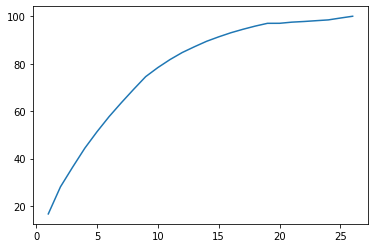

In [295]:
plt.plot(list(range(1,27)),np.cumsum(per))

In [296]:
from sklearn.decomposition import PCA
pca=PCA(n_components=15)
pcadata=pca.fit_transform(scaled)
pcadf=DataFrame(pcadata,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15'])

In [297]:
pcadf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15
0,0.782577,0.687968,-0.538930,-0.526142,0.050110,-0.281037,-0.057037,-0.419707,0.596125,-0.190703,-0.004467,-0.018740,-0.140809,-0.046115,-0.045282
1,-0.511196,-0.122858,0.592452,0.116959,-0.837322,-0.026299,0.151386,-0.319440,0.404893,0.072843,-0.170353,-0.258113,0.063307,-0.367600,-0.025472
2,-1.196047,-0.126088,-0.257542,-0.082713,-0.017260,-0.084996,-0.036988,-0.217048,-0.050614,-0.167559,0.062819,0.228780,-0.085623,0.395231,0.678691
3,0.191328,-0.721156,-0.205000,0.672052,0.140895,-0.303978,-0.319850,-0.128976,-0.006630,0.422962,0.823369,-0.092269,-0.129057,-0.079131,0.038134
4,0.036640,1.179081,0.332086,0.283641,-0.668855,-0.242524,0.583838,0.527298,0.388068,0.135484,-0.185558,-0.224562,0.118725,-0.427673,0.043252


In [ ]:
sns.scatterplot(pcadf['pc5'],pcadf['pc3'])

In [298]:
newdf=pcadf.copy()

In [299]:
newdf['D']=dummy['Default']

In [ ]:
newdf.head()

In [ ]:
newdf.shape

In [ ]:
sns.scatterplot(newdf['pc1'],newdf['pc3'],hue=newdf['D'])

In [300]:
pctrain=newdf.loc[0:train.shape[0]-1,]
pctest=newdf.loc[train.shape[0]:,]

In [301]:
train.shape,pctrain.shape,pctest.shape,test.shape

((132440, 33), (132440, 16), (56760, 16), (56760, 32))

In [303]:
pX=pctrain.drop('D',axis=1)
py=pctrain['D']
pxtest=pctest.drop('D',axis=1)

In [ ]:
pX.shape

In [304]:
py.value_counts()

0.0    97436
1.0    35004
Name: D, dtype: int64

In [305]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=100)
pX,py=smote.fit_resample(pX,py)

In [313]:
pX.shape,pxtest.shape

((194872, 15), (56760, 15))

In [314]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
pcmdt=dt.fit(pX,py)
pcmdt.score(pX,py)

1.0

In [315]:
solution=DataFrame({'ID':test['ID'],'Default':pcmdt.predict(pxtest)})
solution.to_csv('pcmdtOne_TVS_model.csv',index=False)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
pcmdt=dt.fit(X,y)
pcmdt.score(X,y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=100)
pcrf=dt.fit(X,y)
pcrf.score(X,y)

In [ ]:
solution=DataFrame({'ID':test['ID'],'Default':pcrf.predict(xtest)})
solution.to_csv('pcrf_TVS_model.csv',index=False)

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
pcxgb=xgb.fit(X,y)
pcxgb.score(X,y)

In [ ]:
solution=DataFrame({'ID':test['ID'],'Default':pcxgb.predict(xtest)})
solution.to_csv('pcxgb_TVS_model.csv',index=False)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
gbc=AdaBoostClassifier()
pcada=gbc.fit(X,y)
pcada.score(X,y)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
pclr=lr.fit(X,y)
pclr.score(X,y)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
pcgbc=gbc.fit(X,y)
pcgbc.score(X,y)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=100)
tp={'criterion':['gini','entropy'],'max_leaf_nodes':[1,2,3],'min_samples_split':[2,3,4],'min_samples_leaf':[1,2,3]}
gscv1=GridSearchCV(rf,param_grid=tp)
mgscv1=gscv1.fit(X,y)

In [ ]:
y.value_counts()

In [ ]:
X

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=100)
sX,sy=smote.fit_resample(X,y)

In [ ]:
sy.value_counts()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
pcmdt1=dt.fit(sX,sy)
pcmdt1.score(sX,sy)

In [ ]:
solution=DataFrame({'ID':test['ID'],'Default':pcmdt1.predict(xtest)})
solution.to_csv('pcmdt1_TVS_model.csv',index=False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=100)
pcrf1=rf.fit(sX,sy)
pcrf1.score(sX,sy)

In [ ]:
solution=DataFrame({'ID':test['ID'],'Default':pcrf1.predict(xtest)})
solution.to_csv('pcrf1_TVS_model.csv',index=False)

In [ ]:
sX

In [ ]:
from sklearn.model_selection import GridSearchCV
tp={'criterion':['gini','entropy'],'max_leaf_nodes':[6,7,8,9],'min_samples_split':[2,3,4],'min_samples_leaf':[1,2,3]}
dt=DecisionTreeClassifier()
gscv=GridSearchCV(dt,param_grid=tp)
mgscv=gscv.fit(sX,sy)

In [ ]:
mgscv.best_params_

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini',max_leaf_nodes=10,min_samples_leaf=1,min_samples_split=2)
pcmdt2=dt.fit(sX,sy)
pcmdt2.score(sX,sy)
pcmdt2.score(sX,sy)

In [ ]:
from sklearn.model_selection import GridSearchCV
tp={'criterion':['gini','entropy'],'max_leaf_nodes':[6,7,8,9],'min_samples_split':[2,3,4],'min_samples_leaf':[1,2,3]}
dt=DecisionTreeClassifier()
gscv=GridSearchCV(dt,param_grid=tp)
mgscv=gscv.fit(sX,sy)

In [ ]:
mgscv.best_params_

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=100,criterion='gini',max_leaf_nodes=10000,min_samples_leaf=1,min_samples_split=2)
pctrf1=rf.fit(sX,sy)
pctrf1.score(sX,sy)

In [ ]:
solution=DataFrame({'ID':test['ID'],'Default':[1]*test.shape[0]})
solution.to_csv('manual_TVS_model.csv',index=False)

In [ ]:
[1]*test.shape[0]

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(class_weight='balanced')
m21=dt.fit(btrain,y)
f1_score(y,m21.predict(btrain))

In [ ]:
solution=DataFrame({'ID':test['ID'],'Default':m21.predict(btest)})
solution.to_csv('WDT_TVS_model.csv',index=False)

**Combination of PCA and LDA**

In [344]:
pldf=pd.concat([pX,pxtest],axis=0,ignore_index=True)

In [345]:
pldf['lda']=ssdf[0]

In [346]:
pldf['D']=sy

In [347]:
pldf.shape

(251632, 17)

In [352]:
len(pldf.columns[0:-1])

16

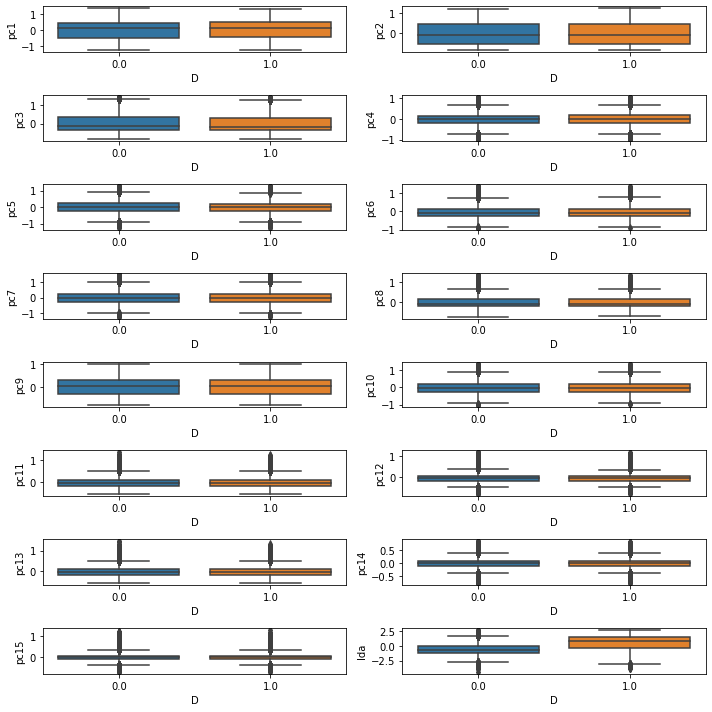

In [358]:
plt.figure(figsize=[10,10])
c=1
for i in pldf.columns[0:-1]:
  plt.subplot(8,2,c)
  sns.boxplot(pldf['D'],pldf[i])
  c=c+1
plt.tight_layout()
plt.show()

In [382]:
pltrain=pldf.loc[0:pX.shape[0]-1,]
pltest=pldf.loc[pX.shape[0]:,]

In [383]:
pltrain.isnull().sum()

pc1     0
pc2     0
pc3     0
pc4     0
pc5     0
pc6     0
pc7     0
pc8     0
pc9     0
pc10    0
pc11    0
pc12    0
pc13    0
pc14    0
pc15    0
lda     0
D       0
dtype: int64

In [384]:
plX=pltrain.drop('D',axis=1)
ply=pltrain['D']
plxtest=pltest.drop('D',axis=1)

In [385]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
ldap=LinearDiscriminantAnalysis(n_components=1)
plX1=ldap.fit(plX,ply).transform(plX)

In [386]:
plX.shape

(194872, 16)

In [388]:
plx=DataFrame(ldap.fit(plX,ply).transform(plxtest))

In [389]:
pred=ldap.predict(plxtest)
pred

array([0., 1., 0., ..., 0., 0., 0.])

In [370]:
len(pred[pred==1])

5411

In [371]:
solution=DataFrame({'ID':test['ID'],'Default':pred})
solution.to_csv('ldapca_TVS_model.csv',index=False)

In [374]:
plX1,lX

(array([[-0.35481756],
        [-0.57111679],
        [-0.05086547],
        ...,
        [ 1.60109837],
        [ 2.04097133],
        [ 0.49833442]]),                0
 0      -0.139278
 1      -0.509084
 2      -1.356741
 3      -0.782041
 4      -1.809951
 ...          ...
 194867  1.188696
 194868  1.034247
 194869  0.792052
 194870  1.762856
 194871  1.543168
 
 [194872 rows x 1 columns])

In [390]:
plXt=DataFrame(plX1)


In [391]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
pldt=dt.fit(plXt,ply)
pldt.score(plXt,ply)

0.9958896095898846

In [392]:
solution=DataFrame({'ID':test['ID'],'Default':pldt.predict(plx)})
solution.to_csv('PCALDADT_TVS_model.csv',index=False)

In [394]:
stats_feat

['Loan_amt',
 'Experience',
 'Company_Rating',
 'Age',
 'hour_Process',
 'c1_rated',
 'c2_rated',
 'Contact_age',
 'Product_bought',
 'ncreditlinks',
 'Vehicle_Status_Y',
 'Region_Type_Rural',
 'Region_Type_other',
 'Credit_Inq_2',
 'Credit_Inq_3',
 'Credit_Inq_>4',
 'Education_det_Other',
 'Education_det_P_Grad',
 'Gen_M',
 'Ph.No_Yes',
 'Type_Loan_RLoan',
 'Region_East',
 'Region_North',
 'Region_South',
 'Addr_permanent_Yes',
 'area']

In [396]:
tvs2.isnull().sum()

Compensation              0
Vehicle_Status            0
Loan_amt                  0
Annuity_amt               0
density_Ind               0
Job_Type                  0
Default_hist              0
Home_Appliances           0
Region_Type               0
Credit_Inq                0
Education_det             0
Marital_Stat              0
Gen                       0
Experience                0
Income_Alt                0
Ph.No                     0
Type_Loan                 0
Dependents                0
Company_Rating            0
Region                    0
Age                       0
hour_Process              0
Addr_permanent            0
Permanent_Addr_tag        0
c1_rated                  0
c2_rated                  0
Contact_age               0
Product_bought            0
Default               56760
area                      0
nproplist                 0
ncreditlinks              0
ndayprocess               0
dtype: int64

In [404]:
tvs2.groupby(['Region','Default']).describe()['hour_Process']

count       mean       std  min   25%   50%   75%   max
Region  Default                                                           
Central 0.0      20055.0  12.099127  3.596016  0.0  10.0  12.0  15.0  24.0
        1.0       7172.0  11.992192  3.570506  0.0  10.0  12.0  15.0  24.0
East    0.0      21086.0  12.237266  3.577125  0.0  10.0  12.0  15.0  25.0
        1.0       7529.0  12.142516  3.591303  0.0  10.0  12.0  15.0  24.0
North   0.0      39225.0  11.989344  3.530784  0.0  10.0  12.0  14.0  25.0
        1.0      13876.0  11.946887  3.520523  0.0  10.0  12.0  14.0  25.0
South   0.0      17070.0  12.054774  3.600192  0.0  10.0  12.0  15.0  25.0
        1.0       6427.0  12.042477  3.612007  0.0   9.0  12.0  15.0  23.0

In [411]:
pldf.groupby('D').describe()['lda']

,count,mean,std,min,25%,50%,75%,max
D,,,,,,,,
0.0,97436.0,-0.546289,0.858869,-4.367323,-1.139578,-0.628763,-0.034787,2.611013
1.0,97436.0,0.546289,1.123541,-3.799165,-0.344211,0.744209,1.457993,2.666292


In [443]:
ad=DataFrame(np.array([0 if i>0.5 else 1 for i in plxtest['lda']]),columns=['r'])

In [421]:
ad.columns

RangeIndex(start=0, stop=1, step=1)

In [444]:
len(ad[ad['r']==1])

49707

In [445]:
solution=DataFrame({'ID':test['ID'],'Default':ad['r']})
solution.to_csv('Hn_TVS_model.csv',index=False)

In [446]:
xtest.head()

,Compensation,Loan_amt,Annuity_amt,density_Ind,Home_Appliances,Experience,Dependents,Company_Rating,Age,hour_Process,c1_rated,c2_rated,Contact_age,Product_bought,area,nproplist,ncreditlinks,ndayprocess,Vehicle_Status_Y,Job_Type_IT,Job_Type_Non-IT,Default_hist_ndf,Region_Type_Rural,Region_Type_other,Credit_Inq_2,Credit_Inq_3,Credit_Inq_>4,Education_det_Other,Education_det_P_Grad,Marital_Stat_Married,Marital_Stat_Single,Marital_Stat_Widow,Gen_M,Income_Alt_Y,Ph.No_Yes,Type_Loan_RLoan,Region_East,Region_North,Region_South,Addr_permanent_Yes,Permanent_Addr_tag_Yes
132440,653106.0,809400.00,9145.51,0.0015,1.0,5.4,3.0,2.0,39.0,11.0,0.349,0.349,3133.0,2.0,2000.000000,2,1,16.475159,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,1
132441,434150.0,72618.75,7683.23,0.0332,4.0,2.3,2.0,3.0,46.0,13.0,0.237,0.237,1730.0,5.0,60.240964,1,1,16.925476,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,1
132442,489060.0,267255.80,9032.85,0.0316,4.0,11.0,3.0,2.0,33.0,15.0,0.111,0.111,759.0,4.0,94.936709,2,1,16.475159,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,1
132443,957294.0,623600.00,12838.25,0.0320,4.0,9.7,2.0,2.0,48.0,12.0,0.323,0.323,609.0,4.0,62.500000,1,1,17.460888,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,1,1,0,1,0,0,1,1
132444,1333739.0,529520.00,11799.09,0.0073,4.0,4.7,2.0,3.0,53.0,7.0,0.940,0.940,1222.0,1.0,273.972603,1,1,16.925476,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,1,1,1,0,1,0,1,1


In [450]:
hr=DataFrame(np.array([1 if i>3 else 0 for i in xtest['hour_Process']]),columns=['hr'])

In [451]:
len(hr[hr['hr']==1])

56283

In [452]:
solution=DataFrame({'ID':test['ID'],'Default':hr['hr']})
solution.to_csv('hr_TVS_model.csv',index=False)

In [458]:
newdum=dummy.copy()


In [461]:
newdum['cathour']=['D' if i>3 else 'ND' for i in newdum['hour_Process']]

In [462]:
new=newdum[['cathour','Default']]

In [463]:
new=pd.get_dummies(new,drop_first=True)

In [464]:
ntrain=new.loc[0:train.shape[0]-1,]
ntest=new.loc[train.shape[0]:]

In [465]:
nX=ntrain.drop('Default',axis=1)
y=ntrain['Default']
nxte=ntest.drop('Default',axis=1)

In [466]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=100)
nX,ny=smote.fit_resample(nX,y)

In [467]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
MDT=dt.fit(nX,ny)
MDT.score(nX,ny)

0.5000513157354571

In [470]:
p=MDT.predict(nxte)


In [472]:
len(p[p==1])

477

In [474]:
ais=[1 if i==0 else 0 for i in p]

In [475]:
solution=DataFrame({'ID':test['ID'],'Default':ais})
solution.to_csv('AS_TVS_model.csv',index=False)

In [477]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
Alr=lr.fit(nX,ny)
Alr.score(nX,ny)

0.5000513157354571